In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.stats.weightstats import DescrStatsW


In [3]:
def calculate_margin_value(data):
    data["margin_p"] = data["conc_p"]/data["emis"]
    data["margin_j40_v1_tract"] = data["conc_j40_v1_tract"]/data["emis"]
    data["margin_outside_v1_tract"] = data["conc_outside_v1_tract"]/data["emis"]
    data["margin_w"] = data["conc_w"]/data["emis"]
    data["margin_b"] = data["conc_b"]/data["emis"]
    data["margin_a"] = data["conc_a"]/data["emis"]
    data["margin_h"] = data["conc_h"]/data["emis"]
    data["margin_m"] = data["conc_m"]/data["emis"]
    data["margin_o"] = data["conc_o"]/data["emis"]
    data["margin_n"] = data["conc_n"]/data["emis"]
    data["margin_lowinc"] = data["conc_lowinc"]/data["emis"]
    data["margin_highinc"] = data["conc_highinc"]/data["emis"]
    return(data)


In [4]:
sector_pollutant_justice40_ejscreen_race=pd.read_csv("../sector_pollutant_justice40_ejscreen_race.csv", index_col = 0)

In [5]:
sector_pollutant_justice40_ejscreen_race = calculate_margin_value(sector_pollutant_justice40_ejscreen_race)

In [6]:
emission_sum_sector_by_pollutant=pd.read_csv("../emission_sum_sector_by_pollutant.csv",index_col = 0)

In [7]:
sector_pollutant_reduce_merge_history = sector_pollutant_justice40_ejscreen_race.merge(emission_sum_sector_by_pollutant[["sector","pollutant","reduction_slope"]])

In [8]:
def sector_pollutant_reduction(data,percent_base):
    data_yearly = data.copy()
    year_list = [0]
    reduce_w = [data.conc_w.sum()]
    reduce_b = [data.conc_b.sum()]
    reduce_a = [data.conc_a.sum()]
    reduce_h = [data.conc_h.sum()]
    reduce_m = [data.conc_m.sum()]
    reduce_o = [data.conc_o.sum()]
    reduce_n = [data.conc_n.sum()]
    reduce_p = [data.conc_p.sum()]
    reduce_j40_v1 = [data.conc_j40_v1_tract.sum()]
    reduce_outside_v1 = [data.conc_outside_v1_tract.sum()]

    reduce_lowinc = [data.conc_lowinc.sum()]
    reduce_highinc = [data.conc_highinc.sum()]

    emis_reduce = [0]

    conc_w = data.conc_w.sum()
    conc_b = data.conc_b.sum()
    conc_a = data.conc_a.sum()
    conc_h = data.conc_h.sum()
    conc_m = data.conc_m.sum()
    conc_n = data.conc_n.sum()
    conc_o = data.conc_o.sum()
    conc_p = data.conc_p.sum()
    conc_j40_v1 = data.conc_j40_v1_tract.sum()
    conc_outside_v1 = data.conc_outside_v1_tract.sum()
    conc_lowinc = data.conc_lowinc.sum()
    conc_highinc = data.conc_highinc.sum()

    emis_reduce_value = 0
    emission_sector = [data_yearly["emis"].to_list()]

    emis_reduce_total = 1
    year = 1
    data_yearly["percent_times"] = data_yearly[percent_base]*1e6
    data_yearly["emis_reduce"] = data_yearly[["emis","percent_times"]].min(axis = 1)
    data_yearly["emis_reduce_step"] = data_yearly["emis_reduce"].values
    while year < 21:
        emis_reduce_value += data_yearly["emis_reduce_step"].sum()
        conc_w -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_w"])
        conc_b -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_b"])
        conc_a -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_a"])
        conc_h -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_h"])
        conc_m -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_m"])
        conc_n -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_n"])
        conc_o -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_o"])
        conc_p -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_p"])
        conc_j40_v1 -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_j40_v1_tract"])
        conc_outside_v1 -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_outside_v1_tract"])
        conc_lowinc -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_lowinc"])
        conc_highinc -= sum(data_yearly["emis_reduce_step"]*data_yearly["margin_highinc"])

        # update emission value
        data_yearly["emis"] = data_yearly["emis"] -data_yearly["emis_reduce_step"]
        data_yearly["emis_reduce_step"] = data_yearly[['emis_reduce','emis']].min(axis=1)
        year_list.append(year)
        reduce_w.append(conc_w)
        reduce_b.append(conc_b)
        reduce_a.append(conc_a)
        reduce_h.append(conc_h)
        reduce_m.append(conc_m)
        reduce_n.append(conc_n)
        reduce_o.append(conc_o)
        reduce_p.append(conc_p)
        reduce_j40_v1.append(conc_j40_v1)
        reduce_outside_v1.append(conc_outside_v1)
        reduce_lowinc.append(conc_lowinc)
        reduce_highinc.append(conc_highinc)
        emis_reduce.append(emis_reduce_value)
        year += 1
        emis_reduce_total = data_yearly["emis_reduce_step"].sum()
        emission_sector.append(data_yearly["emis"].to_list())

    percentage_reduce_conc_year = pd.DataFrame({"year":year_list,"reduce_w":reduce_w,"reduce_b":reduce_b,
                                                             "reduce_h":reduce_h,"reduce_m":reduce_m,"reduce_n":reduce_n,
                                                             "reduce_a":reduce_a,"reduce_o":reduce_o,"reduce_p":reduce_p,
                                                             "reduce_j40_v1":reduce_j40_v1,"reduce_outside_v1":reduce_outside_v1,
                                                             "reduce_lowinc":reduce_lowinc,"reduce_highinc":reduce_highinc,"emis":emis_reduce})
    percentage_reduce_conc_year["disparity_j40_v1"] = percentage_reduce_conc_year["reduce_j40_v1"]-percentage_reduce_conc_year["reduce_p"]
    
    percentage_reduce_conc_year["disparity"] = percentage_reduce_conc_year[["reduce_w","reduce_h","reduce_b","reduce_a","reduce_o","reduce_m"]].max(axis=1)-percentage_reduce_conc_year["reduce_p"]
    percentage_reduce_conc_year["disparity_lowinc"] = percentage_reduce_conc_year["reduce_lowinc"]-percentage_reduce_conc_year["reduce_p"]
    
    percentage_reduce_conc_year["reduce_meg"] = percentage_reduce_conc_year[["reduce_w","reduce_h","reduce_b","reduce_a","reduce_o","reduce_m"]].max(axis=1)
    percentage_reduce_conc_year["reduce_poc"] = (percentage_reduce_conc_year["reduce_p"]*306675006-percentage_reduce_conc_year["reduce_w"]*196052889)/110622117
    
    percentage_reduce_conc_year["disparity_poc"] = percentage_reduce_conc_year["reduce_poc"]-percentage_reduce_conc_year["reduce_p"]

    emission_sector_df = pd.DataFrame(np.array(emission_sector).T.tolist())
    emission_sector_df["sector"] = data_yearly["sector"]
    emission_sector_df["pollutant"] = data_yearly["pollutant"]

    return(percentage_reduce_conc_year,emission_sector_df)



# BAU

In [9]:
percentage_reduce_conc_year_BAU,emission_sector_BAU = sector_pollutant_reduction(sector_pollutant_reduce_merge_history,"reduction_slope")

In [10]:
#Calculate beta of death rate
beta = np.log(1.08)/10

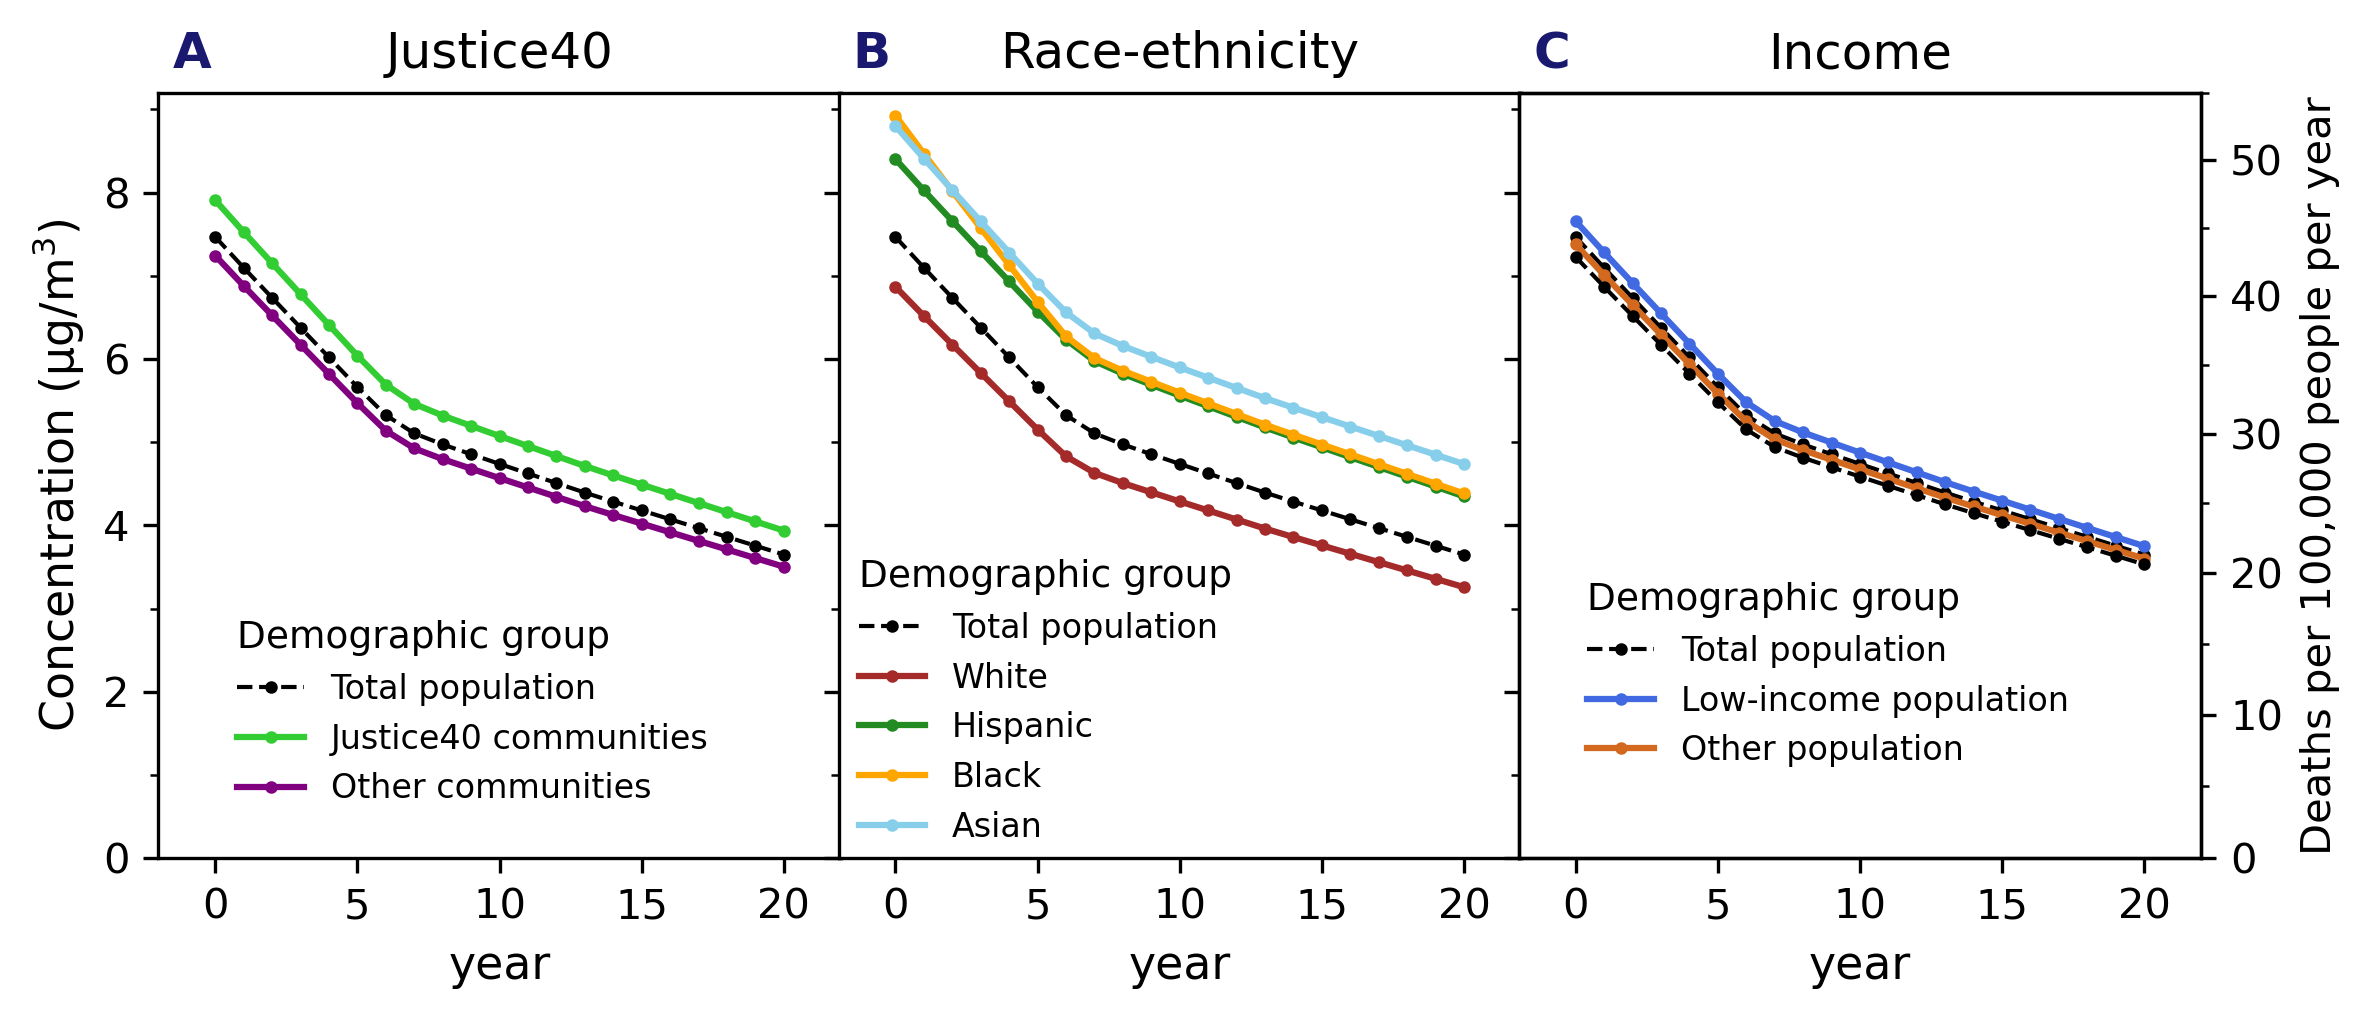

In [11]:
fig, ax = plt.subplots(ncols = 3,figsize = (8,3.5),dpi = 300,sharey = True,sharex = True)
ax[0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_p,color = "black",label = "Total population",marker = "o",markersize = 2, linestyle = "dashed",linewidth = 1)
ax[0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_j40_v1,color = "limegreen",label = "Justice40 communities",marker = "o",markersize = 2)
ax[0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_outside_v1,color = "purple",label = "Other communities",marker = "o",markersize = 2)
ax[0].set_ylabel(r'Concentration ('r'$\rm\mu g/m^3)$',size = 11)
ax[0].set_xlabel("year",size = 11)
ax[1].set_xlabel("year",size = 11)
ax[2].set_xlabel("year",size = 11)

ax[0].set_ylim(0, 9.2)
ax[0].set_xlim(-2,22)
ax[0].set_yticks([0,2,4,6,8])

ax[0].set_yticks([1,3,5,7,9], minor = True)
legend = ax[0].legend(bbox_to_anchor=(0.85, 0.35), frameon=False,prop = {"size":8})
legend.set_title("Demographic group",prop = {"size":9})
legend._legend_box.align = "left"


ax[1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_p,color = "black",label = "Total population",marker = "o",markersize = 2, linestyle = "dashed",linewidth = 1)
ax[1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_w,color = "brown",label = "White",marker = "o",markersize = 2)
ax[1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_h,color = "forestgreen",label = "Hispanic",marker = "o",markersize = 2)
ax[1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_b,color = "orange",label = "Black",marker = "o",markersize = 2)
ax[1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_a,color = "skyblue",label = "Asian",marker = "o",markersize = 2)
legend = ax[1].legend(bbox_to_anchor=(0.62, 0.43), frameon=False,prop = {"size":8})
legend.set_title("Demographic group", prop={'size': 9})
legend._legend_box.align = "left"

ax[2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_p,color = "black",label = "Total population",marker = "o",markersize = 2, linestyle = "dashed",linewidth = 1)
ax[2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_lowinc,color = "royalblue",label = "Low-income population",marker = "o",markersize = 2)
ax[2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_highinc,color = "chocolate",label = "Other population",marker = "o",markersize = 2)


ax2 = ax[2].twinx()
ax2.plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_p,color = "black",label = "Total population",marker = "o",markersize = 2, linestyle = "dashed",linewidth = 1)
ax2.set_ylim(0, 9.2)
ax2.set_yticks([np.log(D/724.6+1)/beta for D in [0,10,20,30,40,50]])
ax2.set_yticks([np.log(D/724.6+1)/beta for D in [5, 15,25,35,45,55]],minor = True)
ax2.set_yticklabels([0,10,20,30,40,50])

ax2.set_ylabel("Deaths per 100,000 people per year")
legend = ax[2].legend(bbox_to_anchor=(0.85, 0.4), frameon=False,prop = {"size":8})
legend.set_title("Demographic group",prop = {"size":9})
legend._legend_box.align = "left"
ax[0].set_title("Justice40")
ax[1].set_title("Race-ethnicity")
ax[2].set_title("Income")
#ax[0].text("A")
ax[0].text(-1.5,9.5, 'A', fontsize = 12,horizontalalignment='left',color = "midnightblue",weight='bold')
ax[1].text(-1.5,9.5, 'B', fontsize = 12,horizontalalignment='left',color = "midnightblue",weight='bold')
ax[2].text(-1.5,9.5, 'C', fontsize = 12,horizontalalignment='left',color = "midnightblue",weight='bold')

plt.tight_layout(w_pad = -1.9)
plt.show()

# BAU - Distribution

In [12]:
for sector_num in range(14):
    vars()['sector_'+str(sector_num)]=pd.read_csv('../sector_'+str(sector_num)+".csv", index_col = 0)

In [13]:
sector_list = np.array(['Ag.', 'Coal Elec.', 'Const.', 'Cooking', 'Diesel HD Veh.',
       'Gas LD Veh.', 'Industrial', 'Misc.', 'Non-coal Elec.', 'Offroad',
       'Res. Gas', 'Res. Other', 'Res. Wood', 'Road Dst.'], dtype=object)


In [14]:
sector_total=pd.read_csv("../Total_conc_by_pollutant.csv",index_col = 0)

In [15]:
isrm_multiyear_ejscreen = pd.read_csv("../isrm_multiyear_ejscreen.csv",index_col = 0)

In [16]:
Total_conc_BAU = sector_total[["isrm","Total"]]

In [17]:
for year in [5, 10, 15, 20]:
    Total_conc_BAU[year] = 0
    for i in range(61):
        sector_num = np.where(sector_list == emission_sector_BAU["sector"][i])[0][0]
        pollutant = emission_sector_BAU.pollutant[i]        
        Total_conc_BAU[year] += vars()['sector_'+str(sector_num)][pollutant]*emission_sector_BAU[year][i]/emission_sector_BAU[0][i]


In [18]:
ejscreen_total_conc = isrm_multiyear_ejscreen.merge(Total_conc_BAU, how = "left")

In [19]:
isrm_tract_j40_v1_population = pd.read_csv("../isrm_tract_j40_v1_population.csv", index_col = 0).rename(columns = {"total_pop":"J40_v1"})
isrm_tract_outside_v1_population = pd.read_csv("../isrm_tract_outside_v1_population.csv", index_col = 0).rename(columns = {"Population":"Non_J40_v1"})

In [20]:
ejscreen_total_conc = ejscreen_total_conc.merge(isrm_tract_j40_v1_population,how = "left").merge(isrm_tract_outside_v1_population,how = "left")

In [21]:
ejscreen_total_conc["Poverty"] = ejscreen_total_conc.Population*ejscreen_total_conc.LOWINCPCT
ejscreen_total_conc["Non_Poverty"] = ejscreen_total_conc.Population - ejscreen_total_conc["Poverty"]

In [22]:
ejscreen_total_conc["J40_v1"] = ejscreen_total_conc["J40_v1"].fillna(0)
ejscreen_total_conc["Non_J40_v1"] = ejscreen_total_conc["Non_J40_v1"].fillna(0)

In [23]:
ejscreen_total_conc["POC"] = ejscreen_total_conc['Population']-ejscreen_total_conc["White"]
ejscreen_total_conc["POC_percent"] = ejscreen_total_conc["POC"]/ejscreen_total_conc['Population']

In [24]:
ejscreen_total_conc = ejscreen_total_conc.fillna(0)

In [25]:
def calculate_quantile(Data, conc,group):
    wq = DescrStatsW(data=np.array(Data[conc]), weights=Data[group])
    test = wq.quantile(probs=np.array([0.1,0.25,0.5,0.75,0.9]), return_pandas=False)
    return(test)

def calculate_mean(Data, conc,group):
    wq = DescrStatsW(data=np.array(Data[conc]), weights=Data[group])
    test = wq.mean
    return(test)
   
def calculate_box_set(Data, conc,group,label):
    quantiles = calculate_quantile(Data,conc,group)
    mean = calculate_mean(Data,conc,group)
    boxset = {'label' : label,
        'whislo': quantiles[0],    # Bottom whisker position
        'q1'    : quantiles[1],    # First quartile (25th percentile)
        'med'   : quantiles[2],    # Median         (50th percentile)
        'q3'    : quantiles[3],    # Third quartile (75th percentile)
        'whishi': quantiles[4],    # Top whisker position
        'fliers': [], 
        'mean': mean# Outliers
             }
    return(boxset)
def race_ethnicity_boxes(Data,conc):
    boxes = [calculate_box_set(Data,conc,"White","White"),
             calculate_box_set(Data,conc,"Hispanic","Hispanic"),
             calculate_box_set(Data,conc,"Black","Black"),
             calculate_box_set(Data,conc,"Asian","Asian")]
    return(boxes)

def justice40_v1_boxes(Data,conc):
    boxes = [calculate_box_set(Data,conc,"J40_v1","Justice40 Location"),
             calculate_box_set(Data,conc,"Non_J40_v1","Other Location")]
    return(boxes)

def income_boxes(Data,conc):
    boxes = [calculate_box_set(Data,conc,"Poverty","Low-income"),
             calculate_box_set(Data,conc,"Non_Poverty","Others")]
    return(boxes)

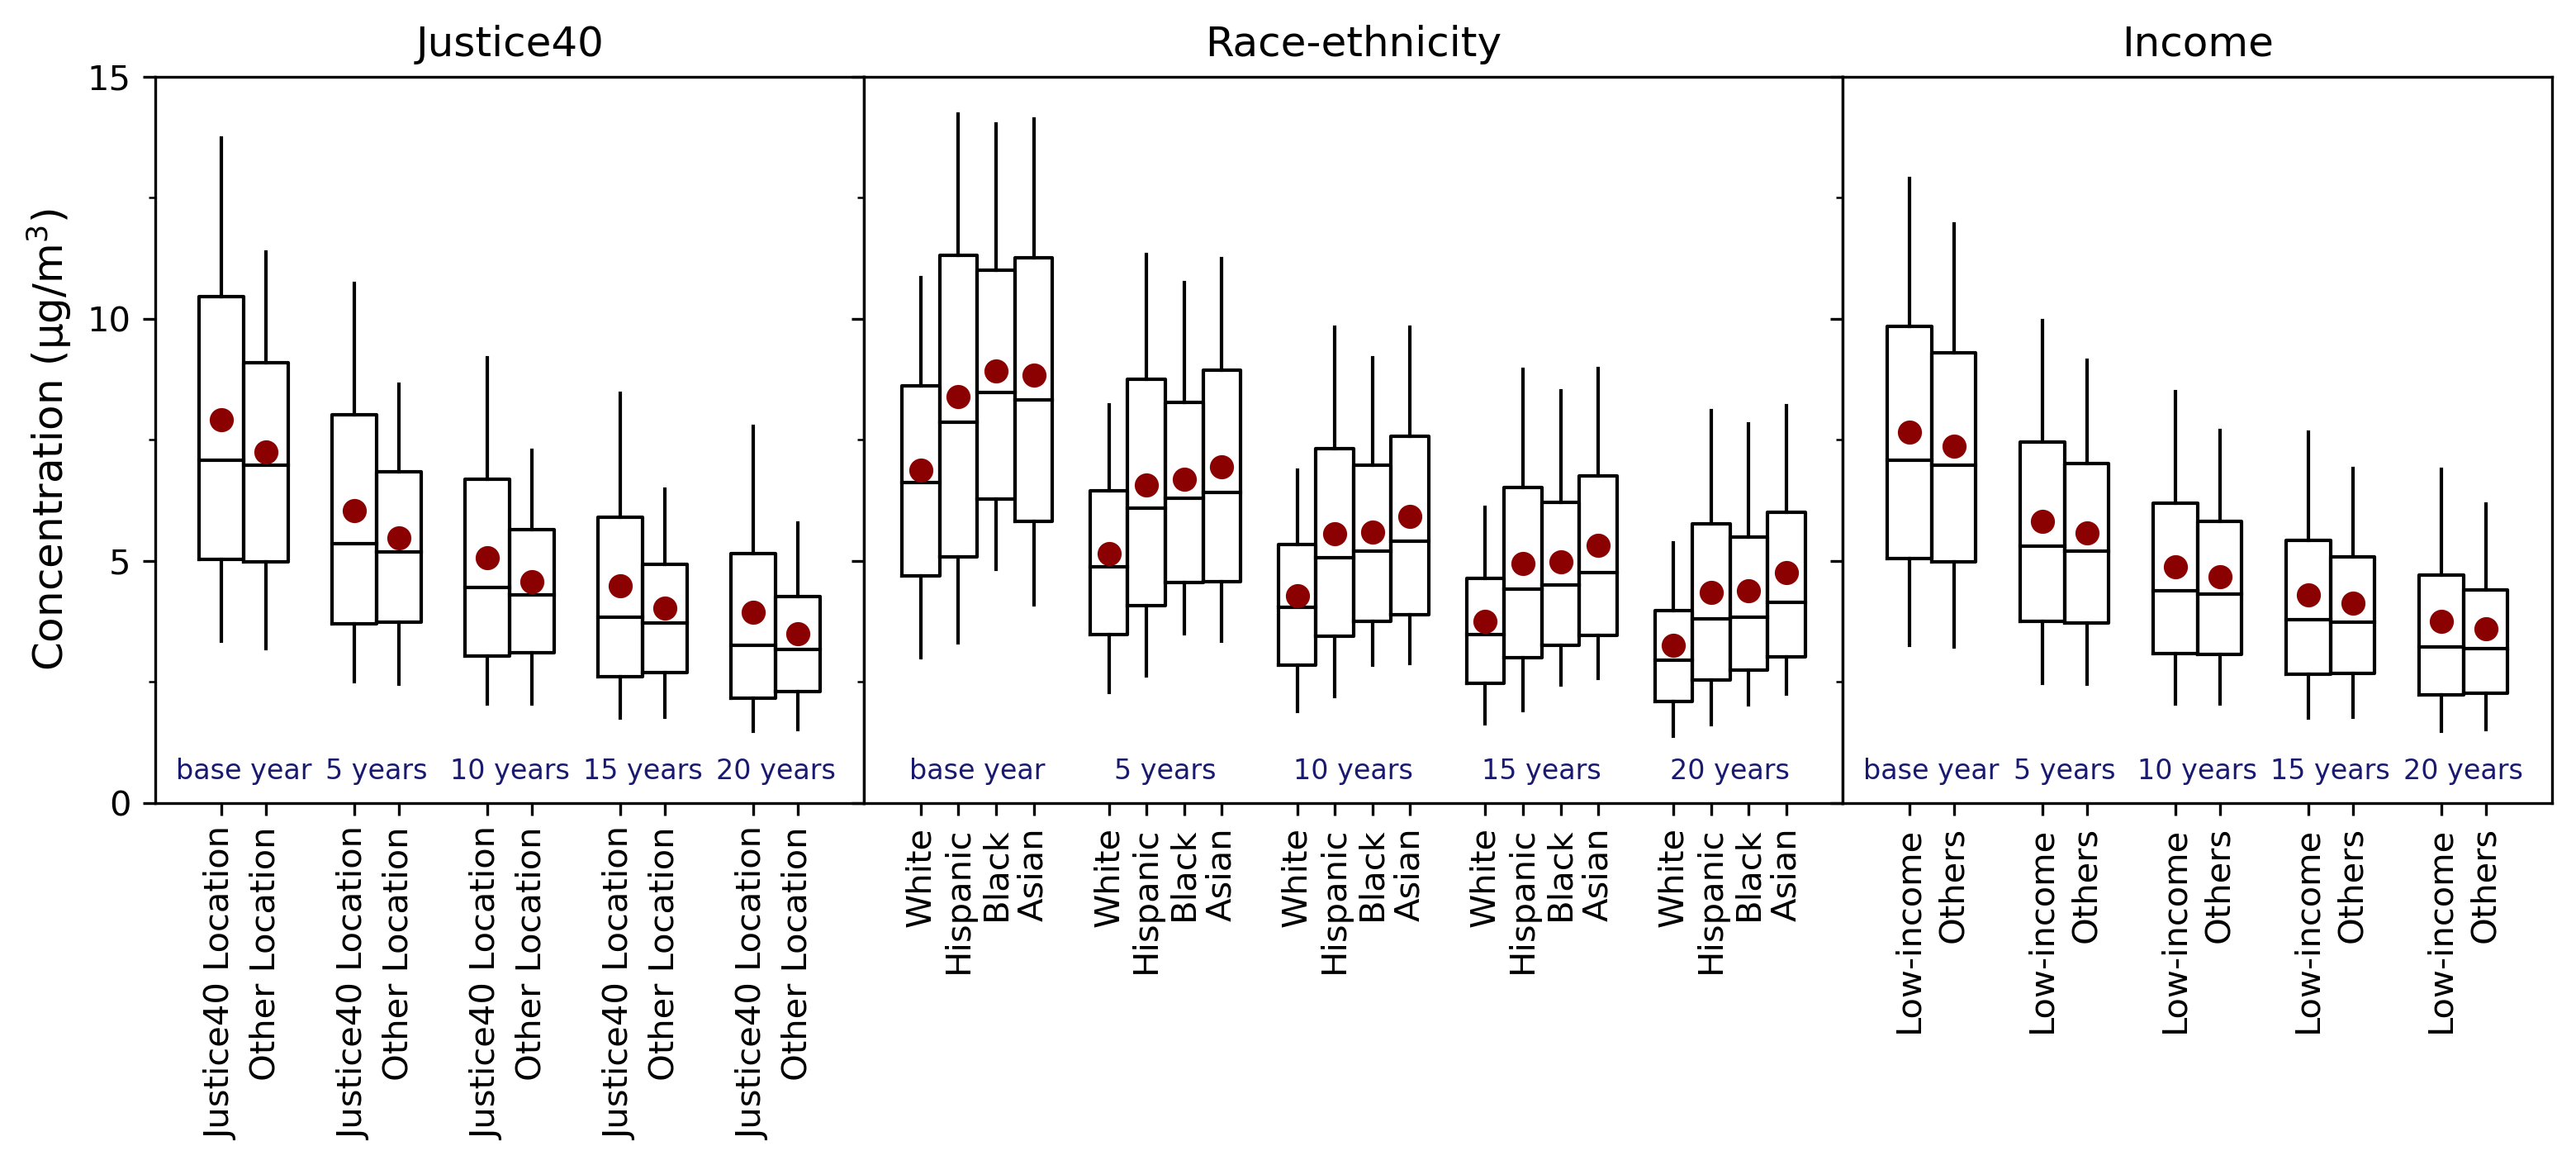

In [26]:
fig, ax = plt.subplots(ncols = 3,figsize = (10.5,4.8),dpi = 300,sharey = True, gridspec_kw={'width_ratios': [1,1.38,1]})
#colors = ["salmon","skyblue","purple","forestgreen"]
colors = "darkred"
ax[0].bxp(justice40_v1_boxes(ejscreen_total_conc,"Total"), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [1,2])
ax[0].bxp(justice40_v1_boxes(ejscreen_total_conc,5), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+3 for i in [1,2]])
ax[0].bxp(justice40_v1_boxes(ejscreen_total_conc,10), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+6 for i in [1,2]])
ax[0].bxp(justice40_v1_boxes(ejscreen_total_conc,15), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+9 for i in [1,2]])
ax[0].bxp(justice40_v1_boxes(ejscreen_total_conc,20), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+12 for i in [1,2]])
ax[0].set_ylabel(r'Concentration ('r'$\rm\mu g/m^3)$',size = 12)
ax[0].set_ylim(0,15)
ax[0].set_yticks([0,5,10,15])
ax[0].set_yticks([2.5,7.5,12.5],minor = True)

ax[0].set_xlim(-0.5, 15.5)
ax[0].set_xticklabels(["Justice40 Location", "Other Location"]*5,rotation=90,horizontalalignment = "center")
ax[0].text(1.5,0.5, 'base year', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[0].text(4.5,0.5, '5 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[0].text(7.5,0.5, '10 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[0].text(10.5,0.5, '15 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[0].text(13.5,0.5, '20 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")



ax[1].bxp(race_ethnicity_boxes(ejscreen_total_conc,"Total"), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [1,2,3,4])
ax[1].bxp(race_ethnicity_boxes(ejscreen_total_conc,5), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+5 for i in [1,2,3,4]])
ax[1].bxp(race_ethnicity_boxes(ejscreen_total_conc,10), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+5*2 for i in [1,2,3,4]])
ax[1].bxp(race_ethnicity_boxes(ejscreen_total_conc,15), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+5*3 for i in [1,2,3,4]])
ax[1].bxp(race_ethnicity_boxes(ejscreen_total_conc,20), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+5*4 for i in [1,2,3,4]])
ax[1].set_xlim(-0.5, 25.5)

ax[1].set_xticklabels(["White","Hispanic","Black","Asian"]*5,rotation=90,horizontalalignment = "center")
ax[1].text(2.5,0.5, 'base year', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[1].text(7.5,0.5, '5 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[1].text(12.5,0.5, '10 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[1].text(17.5,0.5, '15 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[1].text(22.5,0.5, '20 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")


ax[2].bxp(income_boxes(ejscreen_total_conc,"Total"), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [1,2])
ax[2].bxp(income_boxes(ejscreen_total_conc,5), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+3 for i in [1,2]])
ax[2].bxp(income_boxes(ejscreen_total_conc,10), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+6 for i in [1,2]])
ax[2].bxp(income_boxes(ejscreen_total_conc,15), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+9 for i in [1,2]])
ax[2].bxp(income_boxes(ejscreen_total_conc,20), showfliers=False,widths = 1,showcaps = False,showmeans = True,
      meanprops = {"marker":"o","markerfacecolor":colors,"markeredgecolor":colors},medianprops = {"color":"black"},positions = [i+12 for i in [1,2]])
ax[2].set_xlim(-0.5, 15.5)
ax[2].set_xticklabels(["Low-income", "Others"]*5,rotation=90,horizontalalignment = "center")
ax[2].text(1.5,0.5, 'base year', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[2].text(4.5,0.5, '5 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[2].text(7.5,0.5, '10 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[2].text(10.5,0.5, '15 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")
ax[2].text(13.5,0.5, '20 years', fontsize = 8,horizontalalignment='center',color = "midnightblue")

ax[0].set_title("Justice40")
ax[1].set_title("Race-ethnicity")
ax[2].set_title("Income")
plt.tight_layout(w_pad = -0.35)
plt.show()

In [27]:
def calculate_quantile_20(Data, conc,group):
    wq = DescrStatsW(data=np.array(Data[conc]), weights=Data[group])
    test = wq.quantile(probs=np.arange(0,1,0.05), return_pandas=False)
    return(test)


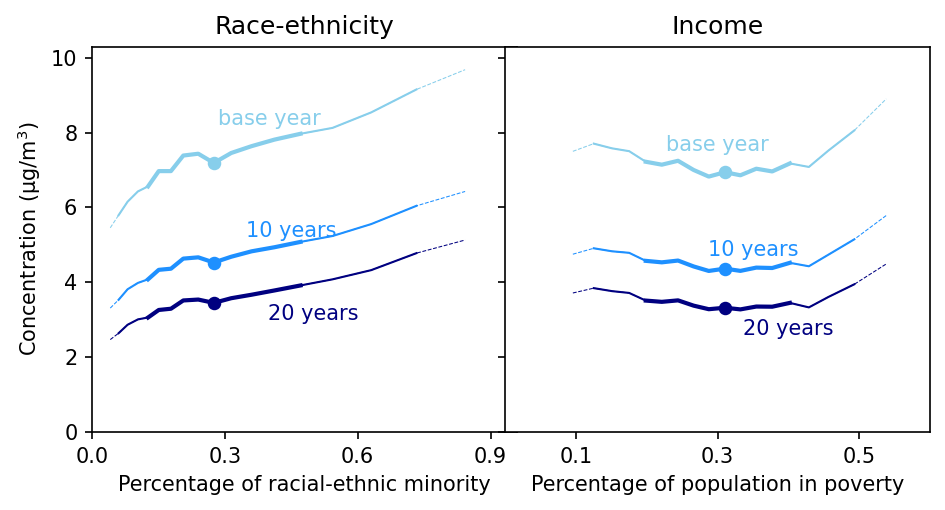

In [28]:
fig, ax = plt.subplots(ncols = 2,figsize = (6.5,3.5),dpi = 150,sharey = True)
POC_list = calculate_quantile_20(ejscreen_total_conc,"POC_percent","Population")
ejscreen_total_conc['POC_rank'] = pd.cut(ejscreen_total_conc['POC_percent'], bins=POC_list, labels=range(1,20,1))

Conc_POC_list = ejscreen_total_conc.groupby("POC_rank").apply(lambda x: DescrStatsW(data=np.array(x["Total"]), weights=x["Population"]).mean)
color = "skyblue"
ax[0].plot(POC_list[1:19],Conc_POC_list[1:19],linestyle = "--", color  = color,linewidth = 0.5)
ax[0].plot(POC_list[2:18],Conc_POC_list[2:18],linestyle = "-", color  = color,linewidth = 1)
ax[0].plot(POC_list[5:15],Conc_POC_list[5:15],linestyle = "-", color  = color,linewidth = 2)
ax[0].scatter(POC_list[10],Conc_POC_list[10], color = color,s = 30,marker = "o")

Conc_POC_list = ejscreen_total_conc.groupby("POC_rank").apply(lambda x: DescrStatsW(data=np.array(x[5]), weights=x["Population"]).mean)
color = "dodgerblue"
Conc_POC_list = ejscreen_total_conc.groupby("POC_rank").apply(lambda x: DescrStatsW(data=np.array(x[10]), weights=x["Population"]).mean)
ax[0].plot(POC_list[1:19],Conc_POC_list[1:19],linestyle = "--", color  = color,linewidth = 0.5)
ax[0].plot(POC_list[2:18],Conc_POC_list[2:18],linestyle = "-", color  = color,linewidth = 1)
ax[0].plot(POC_list[5:15],Conc_POC_list[5:15],linestyle = "-", color  = color,linewidth = 2)
ax[0].scatter(POC_list[10],Conc_POC_list[10], color = color,s = 30,marker = "o")

Conc_POC_list = ejscreen_total_conc.groupby("POC_rank").apply(lambda x: DescrStatsW(data=np.array(x[15]), weights=x["Population"]).mean)
color = "navy"
Conc_POC_list = ejscreen_total_conc.groupby("POC_rank").apply(lambda x: DescrStatsW(data=np.array(x[20]), weights=x["Population"]).mean)
ax[0].plot(POC_list[1:19],Conc_POC_list[1:19],linestyle = "--", color  = color,linewidth = 0.5)
ax[0].plot(POC_list[2:18],Conc_POC_list[2:18],linestyle = "-", color  = color,linewidth = 1)
ax[0].plot(POC_list[5:15],Conc_POC_list[5:15],linestyle = "-", color  = color,linewidth = 2)
ax[0].scatter(POC_list[10],Conc_POC_list[10], color = color,s = 30,marker = "o")

ax[0].set_ylim(0,10.3)
ax[0].text(0.4,8.2, 'base year', fontsize = 10,horizontalalignment='center',color = "skyblue")
ax[0].text(0.45,5.2, '10 years', fontsize = 10,horizontalalignment='center',color = "dodgerblue")
ax[0].text(0.5,3, '20 years', fontsize = 10,horizontalalignment='center',color = "navy")

ax[0].set_ylabel(r'Concentration ('r'$\rm\mu g/m^3)$')
ax[0].set_xlabel("Percentage of racial-ethnic minority")



LWINC_list = calculate_quantile_20(ejscreen_total_conc,"LOWINCPCT","Population")
ejscreen_total_conc['LWINC_rank'] = pd.cut(ejscreen_total_conc['LOWINCPCT'], bins=LWINC_list, labels=range(1,20,1))

Conc_LWINC_list = ejscreen_total_conc.groupby("LWINC_rank").apply(lambda x: DescrStatsW(data=np.array(x["Total"]), weights=x["Population"]).mean)
color = "skyblue"
ax[1].plot(LWINC_list[1:19],Conc_LWINC_list[1:19],linestyle = "--", color  = color,linewidth = 0.5)
ax[1].plot(LWINC_list[2:18],Conc_LWINC_list[2:18],linestyle = "-", color  = color,linewidth = 1)
ax[1].plot(LWINC_list[5:15],Conc_LWINC_list[5:15],linestyle = "-", color  = color,linewidth = 2)
ax[1].scatter(LWINC_list[10],Conc_LWINC_list[10], color = color,s = 30,marker = "o")

Conc_LWINC_list = ejscreen_total_conc.groupby("LWINC_rank").apply(lambda x: DescrStatsW(data=np.array(x[5]), weights=x["Population"]).mean)
color = "dodgerblue"
Conc_LWINC_list = ejscreen_total_conc.groupby("LWINC_rank").apply(lambda x: DescrStatsW(data=np.array(x[10]), weights=x["Population"]).mean)
ax[1].plot(LWINC_list[1:19],Conc_LWINC_list[1:19],linestyle = "--", color  = color,linewidth = 0.5)
ax[1].plot(LWINC_list[2:18],Conc_LWINC_list[2:18],linestyle = "-", color  = color,linewidth = 1)
ax[1].plot(LWINC_list[5:15],Conc_LWINC_list[5:15],linestyle = "-", color  = color,linewidth = 2)
ax[1].scatter(LWINC_list[10],Conc_LWINC_list[10], color = color,s = 30,marker = "o")

Conc_LWINC_list = ejscreen_total_conc.groupby("LWINC_rank").apply(lambda x: DescrStatsW(data=np.array(x[15]), weights=x["Population"]).mean)
color = "navy"
Conc_LWINC_list = ejscreen_total_conc.groupby("LWINC_rank").apply(lambda x: DescrStatsW(data=np.array(x[20]), weights=x["Population"]).mean)
ax[1].plot(LWINC_list[1:19],Conc_LWINC_list[1:19],linestyle = "--", color  = color,linewidth = 0.5)
ax[1].plot(LWINC_list[2:18],Conc_LWINC_list[2:18],linestyle = "-", color  = color,linewidth = 1)
ax[1].plot(LWINC_list[5:15],Conc_LWINC_list[5:15],linestyle = "-", color  = color,linewidth = 2)
ax[1].scatter(LWINC_list[10],Conc_LWINC_list[10], color = color,s = 30,marker = "o")

ax[1].text(0.3,7.5, 'base year', fontsize = 10,horizontalalignment='center',color = "skyblue")
ax[1].text(0.35,4.7, '10 years', fontsize = 10,horizontalalignment='center',color = "dodgerblue")
ax[1].text(0.4,2.6, '20 years', fontsize = 10,horizontalalignment='center',color = "navy")

ax[1].set_xlabel("Percentage of population in poverty")
ax[0].set_xlim(0,0.96)
ax[0].set_xticks([0,0.3,0.6,0.9])

ax[1].set_xlim(0,0.6)
ax[1].set_xticks([0.1,0.3,0.5])
ax[0].set_title("Race-ethnicity")
ax[1].set_title("Income")

plt.tight_layout(w_pad = -2)
plt.show()


# LEZ - Justice40

In [29]:
sector_pollutant_justice40_v1_ejscreen_race_LEZ=pd.read_csv("../sector_pollutant_justice40_v1_ejscreen_race_LEZ.csv", index_col = 0)

In [30]:
sector_pollutant_justice40_v1_ejscreen_race_LEZ = calculate_margin_value(sector_pollutant_justice40_v1_ejscreen_race_LEZ)

In [31]:
sector_pollutant_reduce_merge_history["reduction_percent"]=sector_pollutant_reduce_merge_history["reduction_slope"]/sector_pollutant_reduce_merge_history["emis"]*100

In [32]:
sector_pollutant_reduce_LEZ_v1_merge_history = sector_pollutant_justice40_v1_ejscreen_race_LEZ.merge(sector_pollutant_reduce_merge_history[["pollutant","sector","reduction_percent","reduction_slope"]].rename(columns = {"reduction_slope":"reduction_slope_total"}))

In [33]:
sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope"] = np.where(sector_pollutant_reduce_LEZ_v1_merge_history.J40_v1=="F",
                                                                       sector_pollutant_reduce_LEZ_v1_merge_history["emis"]*sector_pollutant_reduce_LEZ_v1_merge_history["reduction_percent"]/100,
                                                                       np.where(sector_pollutant_reduce_LEZ_v1_merge_history["reduction_percent"]>0, 
                                                                               sector_pollutant_reduce_LEZ_v1_merge_history["emis"]*sector_pollutant_reduce_LEZ_v1_merge_history["reduction_percent"]/100*2,0))

In [34]:
temp = sector_pollutant_reduce_LEZ_v1_merge_history[["sector","pollutant","J40_v1","reduction_slope_total","reduction_slope"]]

In [35]:
temp2 = temp[temp["J40_v1"]=="T"].drop(columns = ["J40_v1"])

In [36]:
temp2["reduction_slope_diff"] = temp2["reduction_slope_total"]-temp2["reduction_slope"]

In [37]:
sector_pollutant_reduce_LEZ_v1_merge_history = sector_pollutant_reduce_LEZ_v1_merge_history.merge(temp2[["sector","pollutant","reduction_slope_diff"]])

In [38]:
sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope_rebound"] = np.where(sector_pollutant_reduce_LEZ_v1_merge_history.J40_v1=="T",
                                                                                sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope"],
                                                                                sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope_diff"])
                                                                                

In [39]:
sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope_4times"] = np.where(sector_pollutant_reduce_LEZ_v1_merge_history.J40_v1=="F",
                                                                       sector_pollutant_reduce_LEZ_v1_merge_history["emis"]*sector_pollutant_reduce_LEZ_v1_merge_history["reduction_percent"]/100,
                                                                       np.where(sector_pollutant_reduce_LEZ_v1_merge_history["reduction_percent"]>0, 
                                                                               sector_pollutant_reduce_LEZ_v1_merge_history["emis"]*sector_pollutant_reduce_LEZ_v1_merge_history["reduction_percent"]/100*4,0))


In [40]:
temp = sector_pollutant_reduce_LEZ_v1_merge_history[["sector","pollutant","J40_v1","reduction_slope_total","reduction_slope_4times"]]

temp2 = temp[temp["J40_v1"]=="T"].drop(columns = ["J40_v1"])

temp2["reduction_slope_4times_diff"] = temp2["reduction_slope_total"]-temp2["reduction_slope_4times"]

sector_pollutant_reduce_LEZ_v1_merge_history = sector_pollutant_reduce_LEZ_v1_merge_history.merge(temp2[["sector","pollutant","reduction_slope_4times_diff"]])

sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope_4times_rebound"] = np.where(sector_pollutant_reduce_LEZ_v1_merge_history.J40_v1=="T",
                                                                                sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope_4times"],
                                                                                sector_pollutant_reduce_LEZ_v1_merge_history["reduction_slope_4times_diff"])
                                                                                

In [41]:
sector_pollutant_reduce_LEZ_v1_merge_history.to_csv("sector_pollutant_reduce_LEZ_v1_merge_history_new_scc.csv")

In [42]:
percentage_reduce_conc_year_LEZ_v1,emission_sector_LEZ_v1 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_v1_merge_history,"reduction_slope")

In [43]:
percentage_reduce_conc_year_LEZ_v1_rebound,emission_sector_LEZ_v1_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_v1_merge_history,"reduction_slope_rebound")

In [44]:
emission_sector_LEZ_v1_rebound["J40_v1"] = sector_pollutant_reduce_LEZ_v1_merge_history.J40_v1

In [45]:
emission_sector_LEZ_v1_rebound_new = emission_sector_LEZ_v1_rebound.sort_values(by = ["J40_v1","sector","pollutant"]).reset_index(drop = True)

In [46]:
replace_values_LEZ_v1_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ_v1_rebound_new.drop(columns = ["J40_v1","sector","pollutant"]).iloc[61:].reset_index(drop = True)

In [47]:
replace_values_LEZ_v1_rebound["sector"]=emission_sector_LEZ_v1_rebound_new["sector"][0:61]
replace_values_LEZ_v1_rebound["pollutant"]=emission_sector_LEZ_v1_rebound_new["pollutant"][0:61]
replace_values_LEZ_v1_rebound["J40_v1"]="F"

In [48]:
emission_sector_LEZ_v1_rebound_new = pd.concat([replace_values_LEZ_v1_rebound[["J40_v1","sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ_v1_rebound_new.iloc[61:]])

In [49]:
def LEZ_v1_rebound_adjust(emission_reduction_data, merged_data):
    merged_data_yearly_sorted = merged_data.copy().sort_values(by = ["J40_v1","sector","pollutant"]).reset_index(drop = True)
    year_list = [0]
    
    reduce_w = [merged_data.conc_w.sum()]
    reduce_b = [merged_data.conc_b.sum()]
    reduce_a = [merged_data.conc_a.sum()]
    reduce_h = [merged_data.conc_h.sum()]
    reduce_m = [merged_data.conc_m.sum()]
    reduce_o = [merged_data.conc_o.sum()]
    reduce_n = [merged_data.conc_n.sum()]
    reduce_p = [merged_data.conc_p.sum()]
    reduce_j40_v1 = [merged_data.conc_j40_v1_tract.sum()]
    reduce_outside_v1 = [merged_data.conc_outside_v1_tract.sum()]
    reduce_lowinc = [merged_data.conc_lowinc.sum()]
    reduce_highinc = [merged_data.conc_highinc.sum()]
    year = 0
    emis_reduce = [0]
    emis = merged_data.emis.sum()

    for i in range(1,21):
        year += 1
        conc_w = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_w"])
        conc_b = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_b"])
        conc_a = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_a"])
        conc_h = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_h"])
        conc_m = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_m"])
        conc_n = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_n"])
        conc_o = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_o"])
        conc_p = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_p"])
        conc_j40_v1 = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_j40_v1_tract"])
        conc_outside_v1 = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_outside_v1_tract"])
        conc_lowinc = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_lowinc"])
        conc_highinc = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_highinc"])

        emis_reduce_value = emis-emission_reduction_data[i].sum()

        year_list.append(year)
        reduce_w.append(conc_w)
        reduce_b.append(conc_b)
        reduce_a.append(conc_a)
        reduce_h.append(conc_h)
        reduce_m.append(conc_m)
        reduce_n.append(conc_n)
        reduce_o.append(conc_o)
        reduce_p.append(conc_p)
        reduce_j40_v1.append(conc_j40_v1)
        reduce_outside_v1.append(conc_outside_v1)
        reduce_lowinc.append(conc_lowinc)
        reduce_highinc.append(conc_highinc)
        emis_reduce.append(emis_reduce_value)

    percentage_reduce_LEZ_v1_conc_year = pd.DataFrame({"year":year_list,"reduce_w":reduce_w,"reduce_b":reduce_b,
                                                            "reduce_h":reduce_h,"reduce_m":reduce_m,"reduce_n":reduce_n,
                                                             "reduce_a":reduce_a,"reduce_o":reduce_o,"reduce_p":reduce_p,
                                                     "reduce_j40_v1":reduce_j40_v1,"reduce_outside_v1":reduce_outside_v1
                                                       ,"reduce_lowinc":reduce_lowinc,"reduce_highinc":reduce_highinc,"emis":emis_reduce})
    percentage_reduce_LEZ_v1_conc_year["disparity_j40_v1"] = percentage_reduce_LEZ_v1_conc_year["reduce_j40_v1"]-percentage_reduce_LEZ_v1_conc_year["reduce_p"]
    
    percentage_reduce_LEZ_v1_conc_year["disparity"] = percentage_reduce_LEZ_v1_conc_year[["reduce_w","reduce_h","reduce_b","reduce_a","reduce_o","reduce_m"]].max(axis=1)-percentage_reduce_LEZ_v1_conc_year["reduce_p"]
    percentage_reduce_LEZ_v1_conc_year["disparity_lowinc"] = percentage_reduce_LEZ_v1_conc_year["reduce_lowinc"]-percentage_reduce_LEZ_v1_conc_year["reduce_p"]
    
    percentage_reduce_LEZ_v1_conc_year["reduce_meg"] = percentage_reduce_LEZ_v1_conc_year[["reduce_w","reduce_h","reduce_b","reduce_a","reduce_o","reduce_m"]].max(axis=1)
    percentage_reduce_LEZ_v1_conc_year["reduce_poc"] = (percentage_reduce_LEZ_v1_conc_year["reduce_p"]*306675006-percentage_reduce_LEZ_v1_conc_year["reduce_w"]*196052889)/110622117
    
    percentage_reduce_LEZ_v1_conc_year["disparity_poc"] = percentage_reduce_LEZ_v1_conc_year["reduce_poc"]-percentage_reduce_LEZ_v1_conc_year["reduce_p"]

    return(percentage_reduce_LEZ_v1_conc_year)



In [50]:
percentage_reduce_conc_year_LEZ_v1,emission_sector_LEZ_v1 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_v1_merge_history,"reduction_slope")

In [51]:
percentage_reduce_conc_year_LEZ_v1_rebound_new = LEZ_v1_rebound_adjust(emission_sector_LEZ_v1_rebound_new, sector_pollutant_reduce_LEZ_v1_merge_history)

In [52]:
percentage_reduce_conc_year_LEZ2_v1,emission_sector_LEZ2_v1 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_v1_merge_history,"reduction_slope_4times")

In [53]:
percentage_reduce_conc_year_LEZ2_v1_rebound,emission_sector_LEZ2_v1_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_v1_merge_history,"reduction_slope_4times_rebound")

In [54]:
emission_sector_LEZ2_v1_rebound["J40_v1"] = sector_pollutant_reduce_LEZ_v1_merge_history.J40_v1

emission_sector_LEZ2_v1_rebound_new = emission_sector_LEZ2_v1_rebound.sort_values(by = ["J40_v1","sector","pollutant"]).reset_index(drop = True)


In [55]:
replace_values_LEZ2_v1_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ2_v1_rebound_new.drop(columns = ["J40_v1","sector","pollutant"]).iloc[61:].reset_index(drop = True)

In [56]:
replace_values_LEZ2_v1_rebound["sector"]=emission_sector_LEZ2_v1_rebound_new["sector"][0:61]
replace_values_LEZ2_v1_rebound["pollutant"]=emission_sector_LEZ2_v1_rebound_new["pollutant"][0:61]
replace_values_LEZ2_v1_rebound["J40_v1"]="F"

In [57]:
emission_sector_LEZ2_v1_rebound_new = pd.concat([replace_values_LEZ2_v1_rebound[["J40_v1","sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ2_v1_rebound_new.iloc[61:]])

In [58]:
percentage_reduce_conc_year_LEZ2_v1_rebound_new = LEZ_v1_rebound_adjust(emission_sector_LEZ2_v1_rebound_new, sector_pollutant_reduce_LEZ_v1_merge_history)

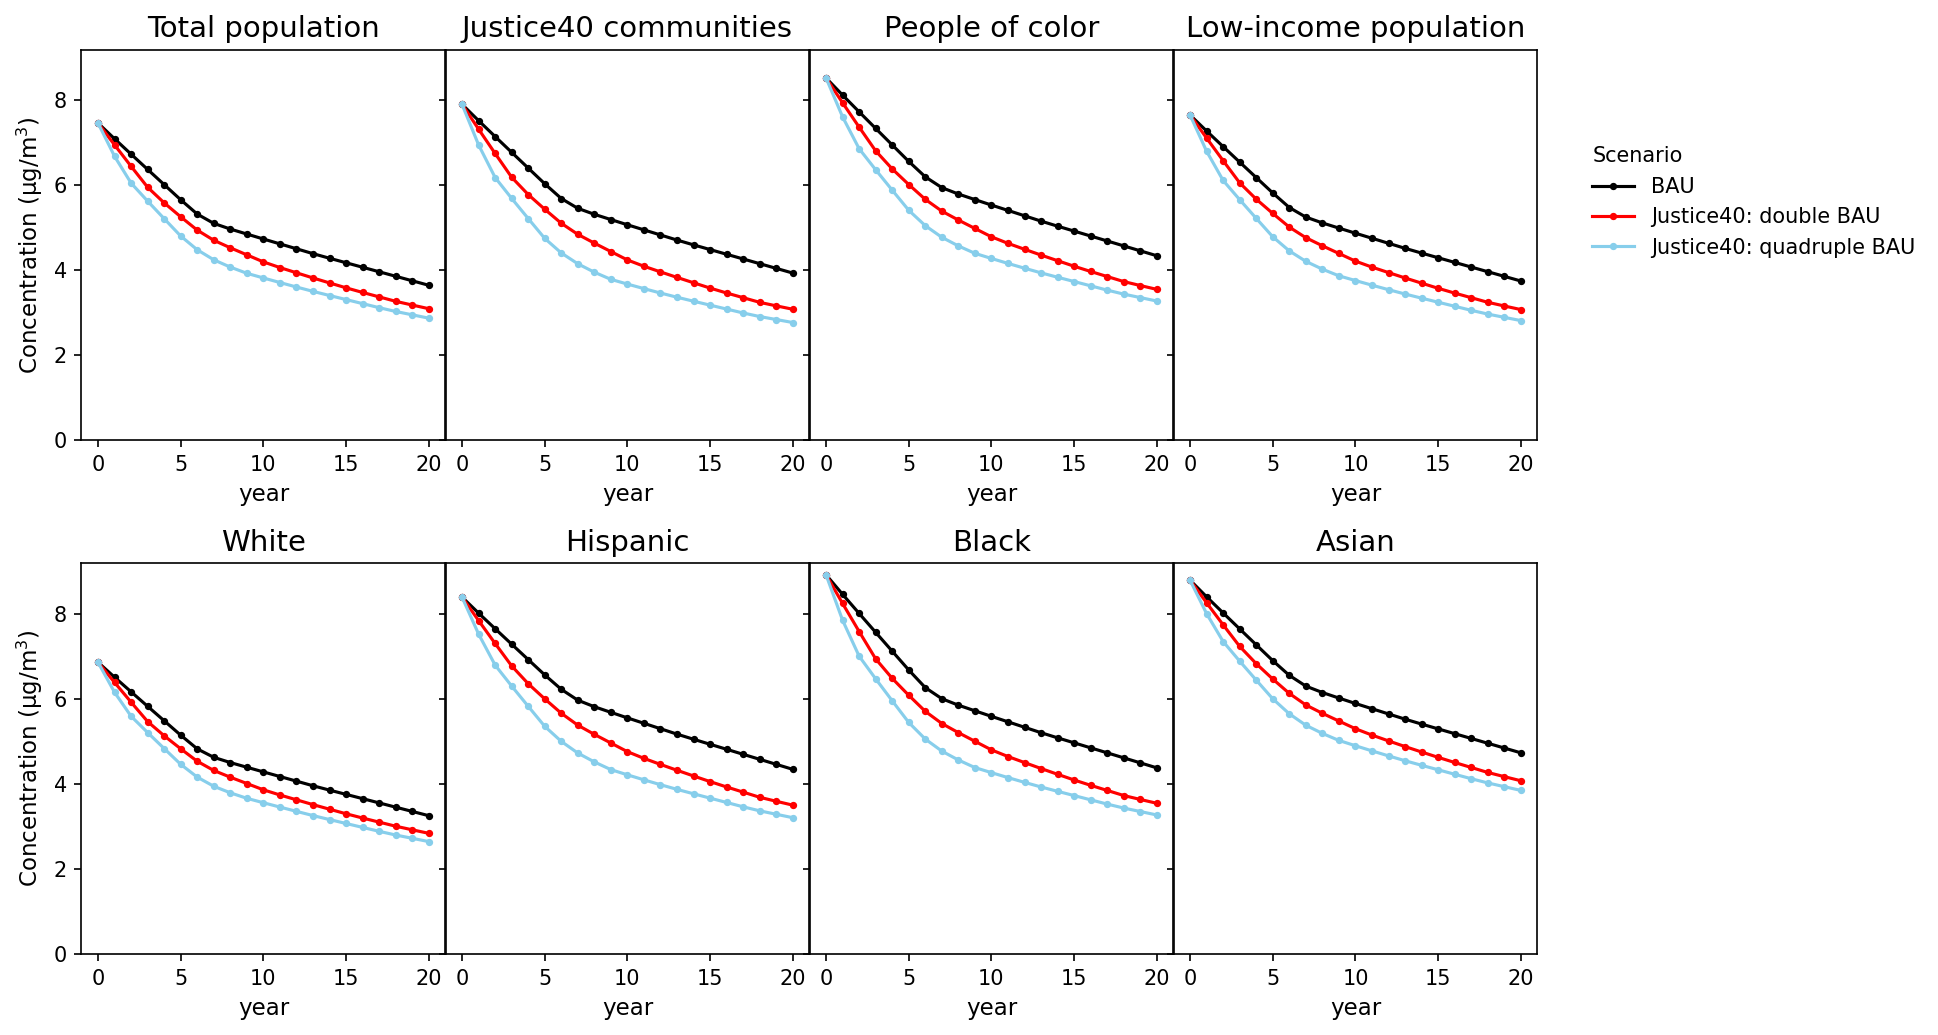

In [59]:
fig, ax = plt.subplots(ncols = 4,nrows = 2, figsize = (13,7),dpi = 150,sharey = True)
ax[0,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_p,color = "black",marker = "o",markersize = 2.5)
ax[0,0].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_p,color = "red",marker = "o",markersize = 2.5)
ax[0,0].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_p,color = "skyblue",marker = "o",markersize = 2.5)

ax[0,0].set_ylabel(r'Concentration ('r'$\rm\mu g/m^3)$',size = 11)
ax[0,0].set_xlabel("year",size = 11)
ax[0,0].set_ylim(0, 9.2)

ax[0,1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_j40_v1,color = "black",marker = "o",markersize = 2.5)
ax[0,1].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_j40_v1,color = "red",marker = "o",markersize = 2.5)

ax[0,1].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_j40_v1,color = "skyblue",marker = "o",markersize = 2.5)

ax[0,1].set_xlabel("year",size = 11)

ax[0,2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_poc,color = "black",marker = "o",markersize = 2.5)
ax[0,2].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_poc,color = "red",marker = "o",markersize = 2.5)

ax[0,2].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_poc,color = "skyblue",marker = "o",markersize = 2.5)

ax[0,2].set_xlabel("year",size = 11)


ax[0,3].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_lowinc,color = "black",label = "BAU",marker = "o",markersize = 2.5)
ax[0,3].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_lowinc,color = "red",label = "Justice40: double BAU",marker = "o",markersize = 2.5)

ax[0,3].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_lowinc,color = "skyblue",label = "Justice40: quadruple BAU",marker = "o",markersize = 2.5)
ax[0,3].set_xlabel("year",size = 11)


ax[1,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_w,color = "black",marker = "o",markersize = 2.5)
ax[1,0].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_w,color = "red",marker = "o",markersize = 2.5)
ax[1,0].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_w,color = "skyblue",marker = "o",markersize = 2.5)

ax[1,0].set_ylabel(r'Concentration ('r'$\rm\mu g/m^3)$',size = 11)
ax[1,0].set_xlabel("year",size = 11)
ax[1,0].set_ylim(0, 9.2)

ax[1,1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_h,color = "black",marker = "o",markersize = 2.5)
ax[1,1].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_h,color = "red",marker = "o",markersize = 2.5)
ax[1,1].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_h,color = "skyblue",marker = "o",markersize = 2.5)
ax[1,1].set_xlabel("year",size = 11)

ax[1,2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_b,color = "black",marker = "o",markersize = 2.5)
ax[1,2].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_b,color = "red",marker = "o",markersize = 2.5)
ax[1,2].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_b,color = "skyblue",marker = "o",markersize = 2.5)
ax[1,2].set_xlabel("year",size = 11)

ax[1,3].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.reduce_a,color = "black",marker = "o",markersize = 2.5)
ax[1,3].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.reduce_a,color = "red",marker = "o",markersize = 2.5)
ax[1,3].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.reduce_a,color = "skyblue",marker = "o",markersize = 2.5)
ax[1,3].set_xlabel("year",size = 11)

legend = ax[0,3].legend(bbox_to_anchor=(1.1, 0.8), frameon=False)
legend.set_title("Scenario")
legend._legend_box.align = "left"

ax[0,0].set_title("Total population",size = 14)
ax[0,1].set_title("Justice40 communities",size = 14)
ax[0,2].set_title("People of color",size = 14)
ax[0,3].set_title("Low-income population",size = 14)

ax[1,0].set_title("White",size = 14)
ax[1,1].set_title("Hispanic",size = 14)
ax[1,2].set_title("Black",size = 14)
ax[1,3].set_title("Asian",size = 14)

plt.tight_layout(w_pad = -0.4 )

plt.show()


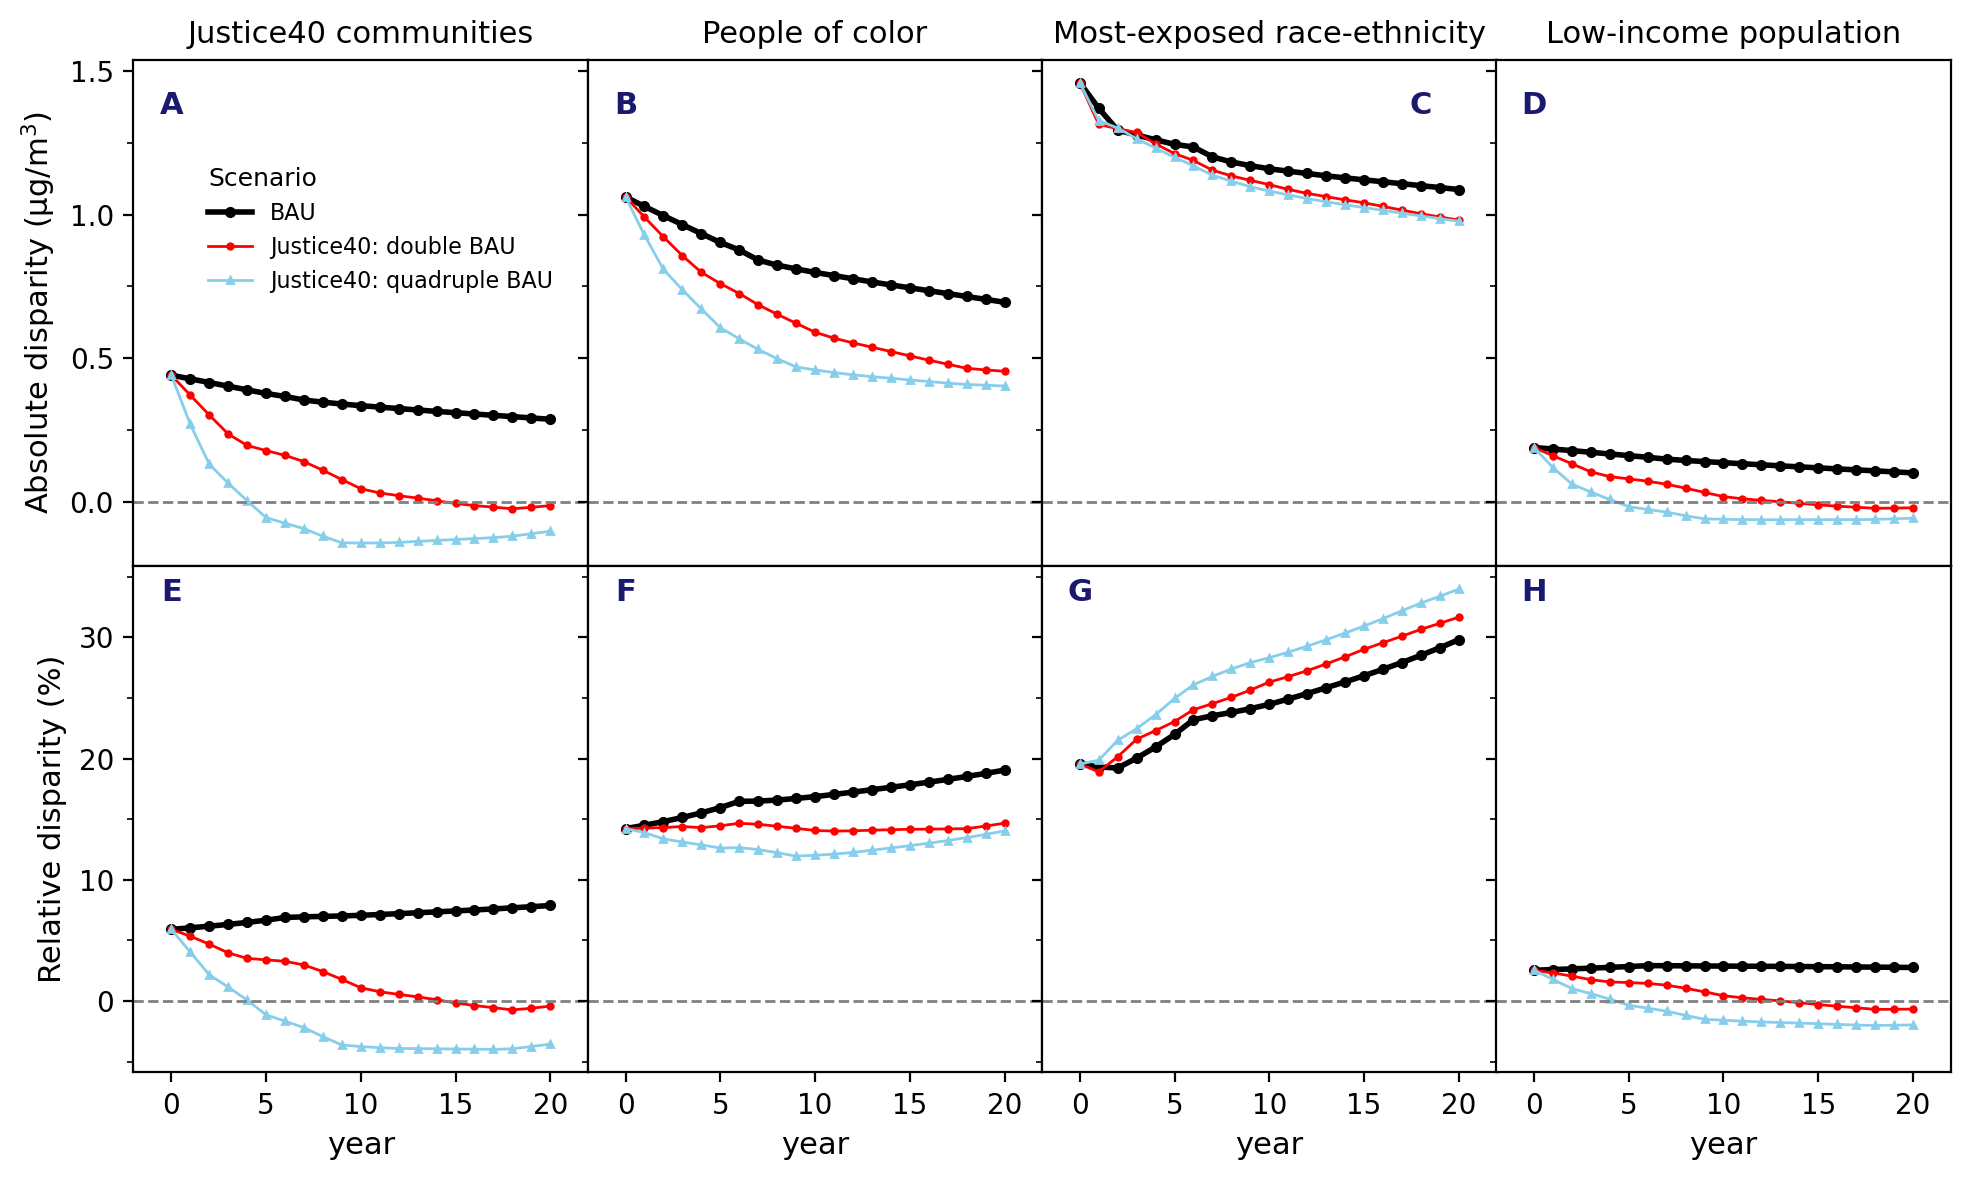

In [60]:
fig, ax = plt.subplots(nrows = 2,ncols = 4, figsize = (10,6),dpi = 200,sharey = "row",sharex = True)
plt.rcParams["font.family"] = "sans"

ax[0,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_j40_v1,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[0,0].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1,color = "red",label = "Justice40: double BAU",marker = "o",markersize = 2,linewidth = 1)
ax[0,0].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_j40_v1,color = "skyblue",label = "Justice40: quadruple BAU",marker = "^",markersize = 2,linewidth = 1)

ax[0,0].set_ylabel(r'Absolute disparity ('r'$\rm\mu g/m^3)$',size = 11)
ax[0,0].set_yticks([0,0.5,1,1.5,2])
ax[0,0].set_yticks([-0.25,0.25,0.75,1.25,1.75], minor = True)
ax[0,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[0,1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_poc,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[0,1].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_poc,color = "red",label = "LEZ",marker = "o",markersize = 2,linewidth = 1)
ax[0,1].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_poc,color = "skyblue",label = "LEZ-extreme",marker = "^",markersize = 2,linewidth = 1)

ax[0,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[0,2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[0,2].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity,color = "red",label = "LEZ",marker = "o",markersize = 2,linewidth = 1)

ax[0,2].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity,color = "skyblue",label = "LEZ-extreme",marker = "^",markersize = 2,linewidth = 1)

ax[0,2].set_yticks([0,0.5,1,1.5,2])
ax[0,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)


ax[0,3].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_lowinc,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[0,3].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_lowinc,color = "red",label = "Justice40: double BAU",marker = "o",markersize = 2,linewidth = 1)

ax[0,3].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_lowinc,color = "skyblue",label = "Justice40: QUADRUPLE BAU",marker = "^",markersize = 2,linewidth = 1)

ax[0,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)


ax[0,0].set_title("Justice40 communities",size = 11)
ax[0,1].set_title("People of color",size = 11)
ax[0,2].set_title("Most-exposed race-ethnicity",size = 11)
ax[0,3].set_title("Low-income population",size = 11)


ax[1,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_j40_v1/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[1,0].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",label = "LEZ",marker = "o",markersize = 2,linewidth = 1)
ax[1,0].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_j40_v1/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",label = "LEZ-extreme",marker = "^",markersize = 2,linewidth = 1)

ax[1,0].set_ylabel(r'Relative disparity (%)',size = 11)
ax[1,0].set_xlabel("year",size = 11)
ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[1,1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_poc/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[1,1].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_poc/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",label = "LEZ",marker = "o",markersize = 2,linewidth = 1)
ax[1,1].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_poc/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",label = "LEZ-extreme",marker = "^",markersize = 2,linewidth = 1)

ax[1,1].set_xlabel("year",size = 11)
ax[1,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[1,2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[1,2].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",label = "LEZ",marker = "o",markersize = 2,linewidth = 1)

ax[1,2].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",label = "LEZ-extreme",marker = "^",markersize = 2,linewidth = 1)

ax[1,2].set_xlabel("year",size = 11)
ax[1,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)


ax[1,3].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_lowinc/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[1,3].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_lowinc/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",label = "LEZ",marker = "o",markersize = 2,linewidth = 1)

ax[1,3].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_lowinc/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",label = "LEZ-extreme",marker = "^",markersize = 2,linewidth = 1)

ax[1,3].set_xlabel("year",size = 11)
ax[1,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

plt.tight_layout(w_pad = -2.1,h_pad = -0.35)
ax[1,0].set_xlim(-2,22)

ax[1,0].set_yticks([0,10,20,30])
ax[1,0].set_yticks([-5,5,15,25,35], minor = True)

legend = ax[0,0].legend(bbox_to_anchor=(0.12, 0.5), frameon=False, prop={'size': 8})
legend.set_title("Scenario", prop={'size': 9})
legend._legend_box.align = "left"

ax[0,0].text(0,1.35, 'A', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[0,1].text(0,1.35, 'B', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[0,2].text(18,1.35, 'C', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[0,3].text(0,1.35, 'D', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,0].text(0,33, 'E', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,1].text(0,33, 'F', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,2].text(0,33, 'G', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,3].text(0,33, 'H', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')

plt.show()

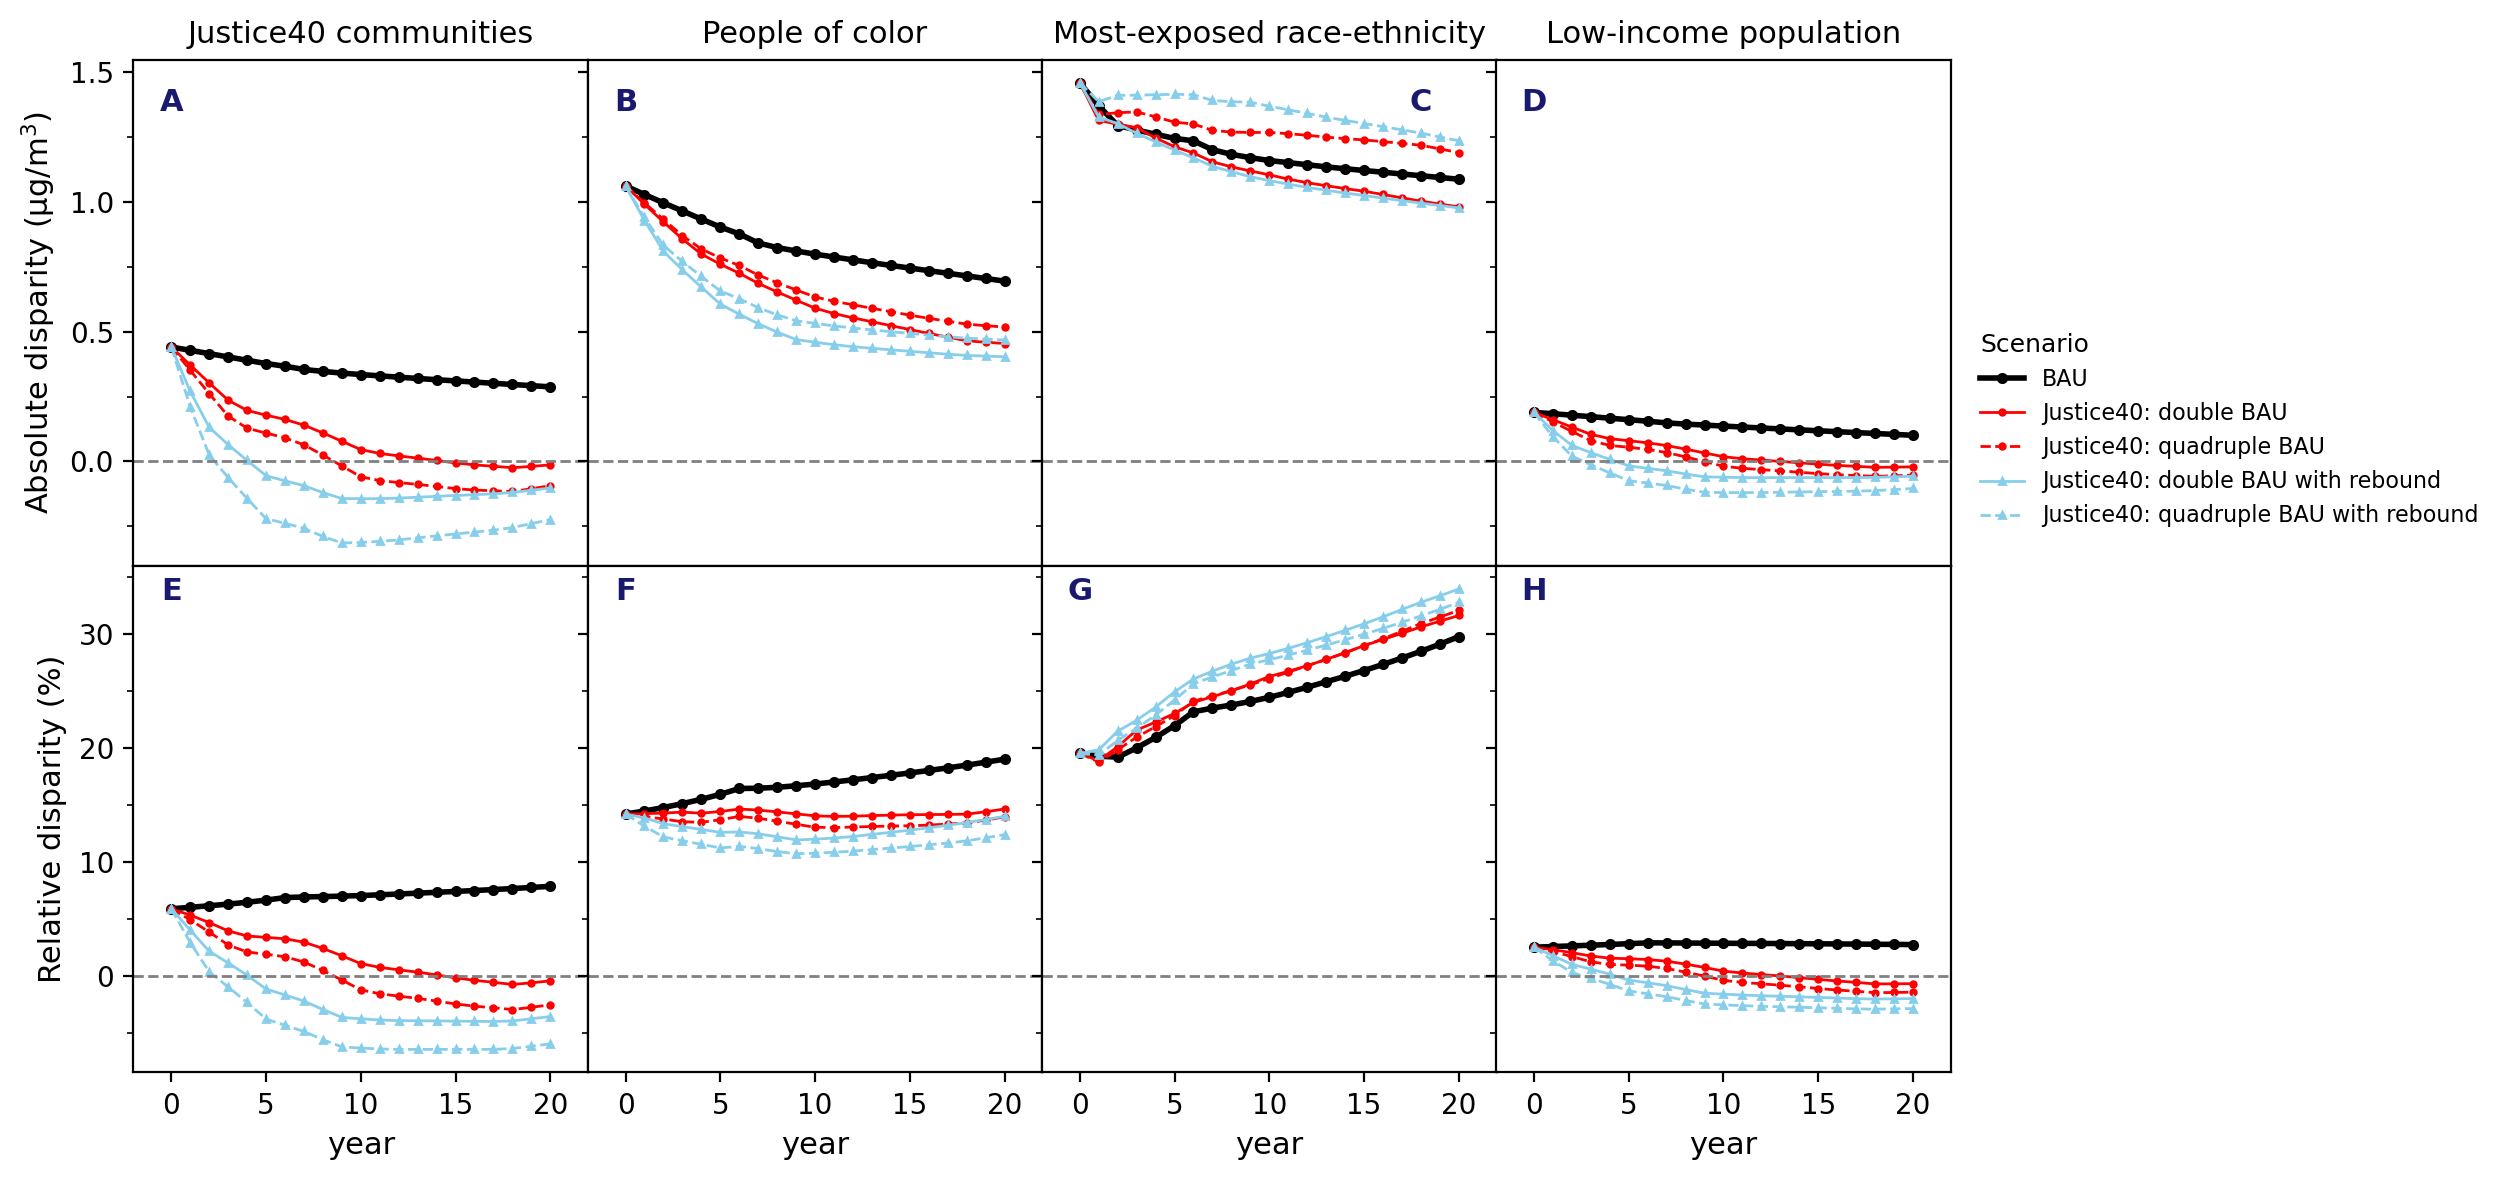

In [61]:
fig, ax = plt.subplots(nrows = 2,ncols = 4, figsize = (10,6),dpi = 200,sharey = "row",sharex = True)
plt.rcParams["font.family"] = "sans"

ax[0,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_j40_v1,color = "black",marker = "o",markersize = 3,linewidth = 2)
ax[0,0].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1,color = "red",marker = "o",markersize = 2, linewidth = 1)
ax[0,0].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_j40_v1,color = "red",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)
ax[0,0].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_j40_v1,color = "skyblue",marker = "^",markersize = 2, linewidth = 1)
ax[0,0].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity_j40_v1,color = "skyblue",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[0,0].set_ylabel(r'Absolute disparity ('r'$\rm\mu g/m^3)$',size = 11)
ax[0,0].set_yticks([0,0.5,1,1.5,2])
ax[0,0].set_yticks([-0.25,0.25,0.75,1.25,1.75], minor = True)
ax[0,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[0,1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_poc,color = "black",marker = "o",markersize = 3,linewidth = 2)
ax[0,1].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_poc,color = "red",marker = "o",markersize = 2, linewidth = 1)
ax[0,1].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_poc,color = "red",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)
ax[0,1].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_poc,color = "skyblue",marker = "^",markersize = 2, linewidth = 1)
ax[0,1].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity_poc,color = "skyblue",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[0,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[0,2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity,color = "black",marker = "o",markersize = 3,linewidth = 2)
ax[0,2].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity,color = "red",marker = "o",markersize = 2, linewidth = 1)
ax[0,2].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity,color = "red",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)

ax[0,2].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity,color = "skyblue",marker = "^",markersize = 2, linewidth = 1)
ax[0,2].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity,color = "skyblue",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[0,2].set_yticks([0,0.5,1,1.5,2])
ax[0,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)


ax[0,3].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_lowinc,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
ax[0,3].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_lowinc,color = "red",label = "Justice40: double BAU",marker = "o",markersize = 2, linewidth = 1)
ax[0,3].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_lowinc,color = "red",label = "Justice40: quadruple BAU",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)

ax[0,3].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_lowinc,color = "skyblue",label = "Justice40: double BAU with rebound",marker = "^",markersize = 2, linewidth = 1)
ax[0,3].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity_lowinc,color = "skyblue",label = "Justice40: quadruple BAU with rebound",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[0,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)


ax[0,0].set_title("Justice40 communities",size = 11)
ax[0,1].set_title("People of color",size = 11)
ax[0,2].set_title("Most-exposed race-ethnicity",size = 11)
ax[0,3].set_title("Low-income population",size = 11)


ax[1,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_j40_v1/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",marker = "o",markersize = 3,linewidth = 2)
ax[1,0].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",marker = "o",markersize = 2, linewidth = 1)
ax[1,0].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_j40_v1/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p*100,color = "red",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)
ax[1,0].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_j40_v1/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",marker = "^",markersize = 2, linewidth = 1)
ax[1,0].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity_j40_v1/percentage_reduce_conc_year_LEZ2_v1_rebound_new.reduce_p*100,color = "skyblue",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[1,0].set_ylabel(r'Relative disparity (%)',size = 11)
ax[1,0].set_xlabel("year",size = 11)
ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[1,1].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_poc/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",marker = "o",markersize = 3,linewidth = 2)
ax[1,1].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_poc/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",marker = "o",markersize = 2, linewidth = 1)
ax[1,1].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_poc/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p*100,color = "red",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)
ax[1,1].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_poc/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",marker = "^",markersize = 2, linewidth = 1)
ax[1,1].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity_poc/percentage_reduce_conc_year_LEZ2_v1_rebound_new.reduce_p*100,color = "skyblue",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[1,1].set_xlabel("year",size = 11)
ax[1,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

ax[1,2].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",marker = "o",markersize = 3,linewidth = 2)
ax[1,2].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",marker = "o",markersize = 2, linewidth = 1)
ax[1,2].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p*100,color = "red",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)

ax[1,2].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",marker = "^",markersize = 2, linewidth = 1)
ax[1,2].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity/percentage_reduce_conc_year_LEZ2_v1_rebound_new.reduce_p*100,color = "skyblue",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[1,2].set_xlabel("year",size = 11)
ax[1,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)


ax[1,3].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_lowinc/percentage_reduce_conc_year_BAU.reduce_p*100,color = "black",marker = "o",markersize = 3,linewidth = 2)
ax[1,3].plot(percentage_reduce_conc_year_LEZ_v1.year,percentage_reduce_conc_year_LEZ_v1.disparity_lowinc/percentage_reduce_conc_year_LEZ_v1.reduce_p*100,color = "red",marker = "o",markersize = 2, linewidth = 1)
ax[1,3].plot(percentage_reduce_conc_year_LEZ_v1_rebound_new.year,percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_lowinc/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p*100,color = "red",marker = "o",markersize = 2,linestyle = "--", linewidth = 1)

ax[1,3].plot(percentage_reduce_conc_year_LEZ2_v1.year,percentage_reduce_conc_year_LEZ2_v1.disparity_lowinc/percentage_reduce_conc_year_LEZ2_v1.reduce_p*100,color = "skyblue",marker = "^",markersize = 2, linewidth = 1)
ax[1,3].plot(percentage_reduce_conc_year_LEZ2_v1_rebound_new.year,percentage_reduce_conc_year_LEZ2_v1_rebound_new.disparity_lowinc/percentage_reduce_conc_year_BAU.reduce_p*100,color = "skyblue",marker = "^",markersize = 2,linestyle = "--", linewidth = 1)

ax[1,3].set_xlabel("year",size = 11)
ax[1,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 1)

plt.tight_layout(w_pad = -2.1,h_pad = -0.35)
ax[1,0].set_xlim(-2,22)

ax[1,0].set_yticks([0,10,20,30])
ax[1,0].set_yticks([-5,5,15,25,35], minor = True)

legend = ax[0,3].legend(bbox_to_anchor=(1.02, 0.5), frameon=False, prop={'size': 8})
legend.set_title("Scenario", prop={'size': 9})
legend._legend_box.align = "left"

ax[0,0].text(0,1.35, 'A', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[0,1].text(0,1.35, 'B', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[0,2].text(18,1.35, 'C', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[0,3].text(0,1.35, 'D', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,0].text(0,33, 'E', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,1].text(0,33, 'F', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,2].text(0,33, 'G', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,3].text(0,33, 'H', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')

plt.show()


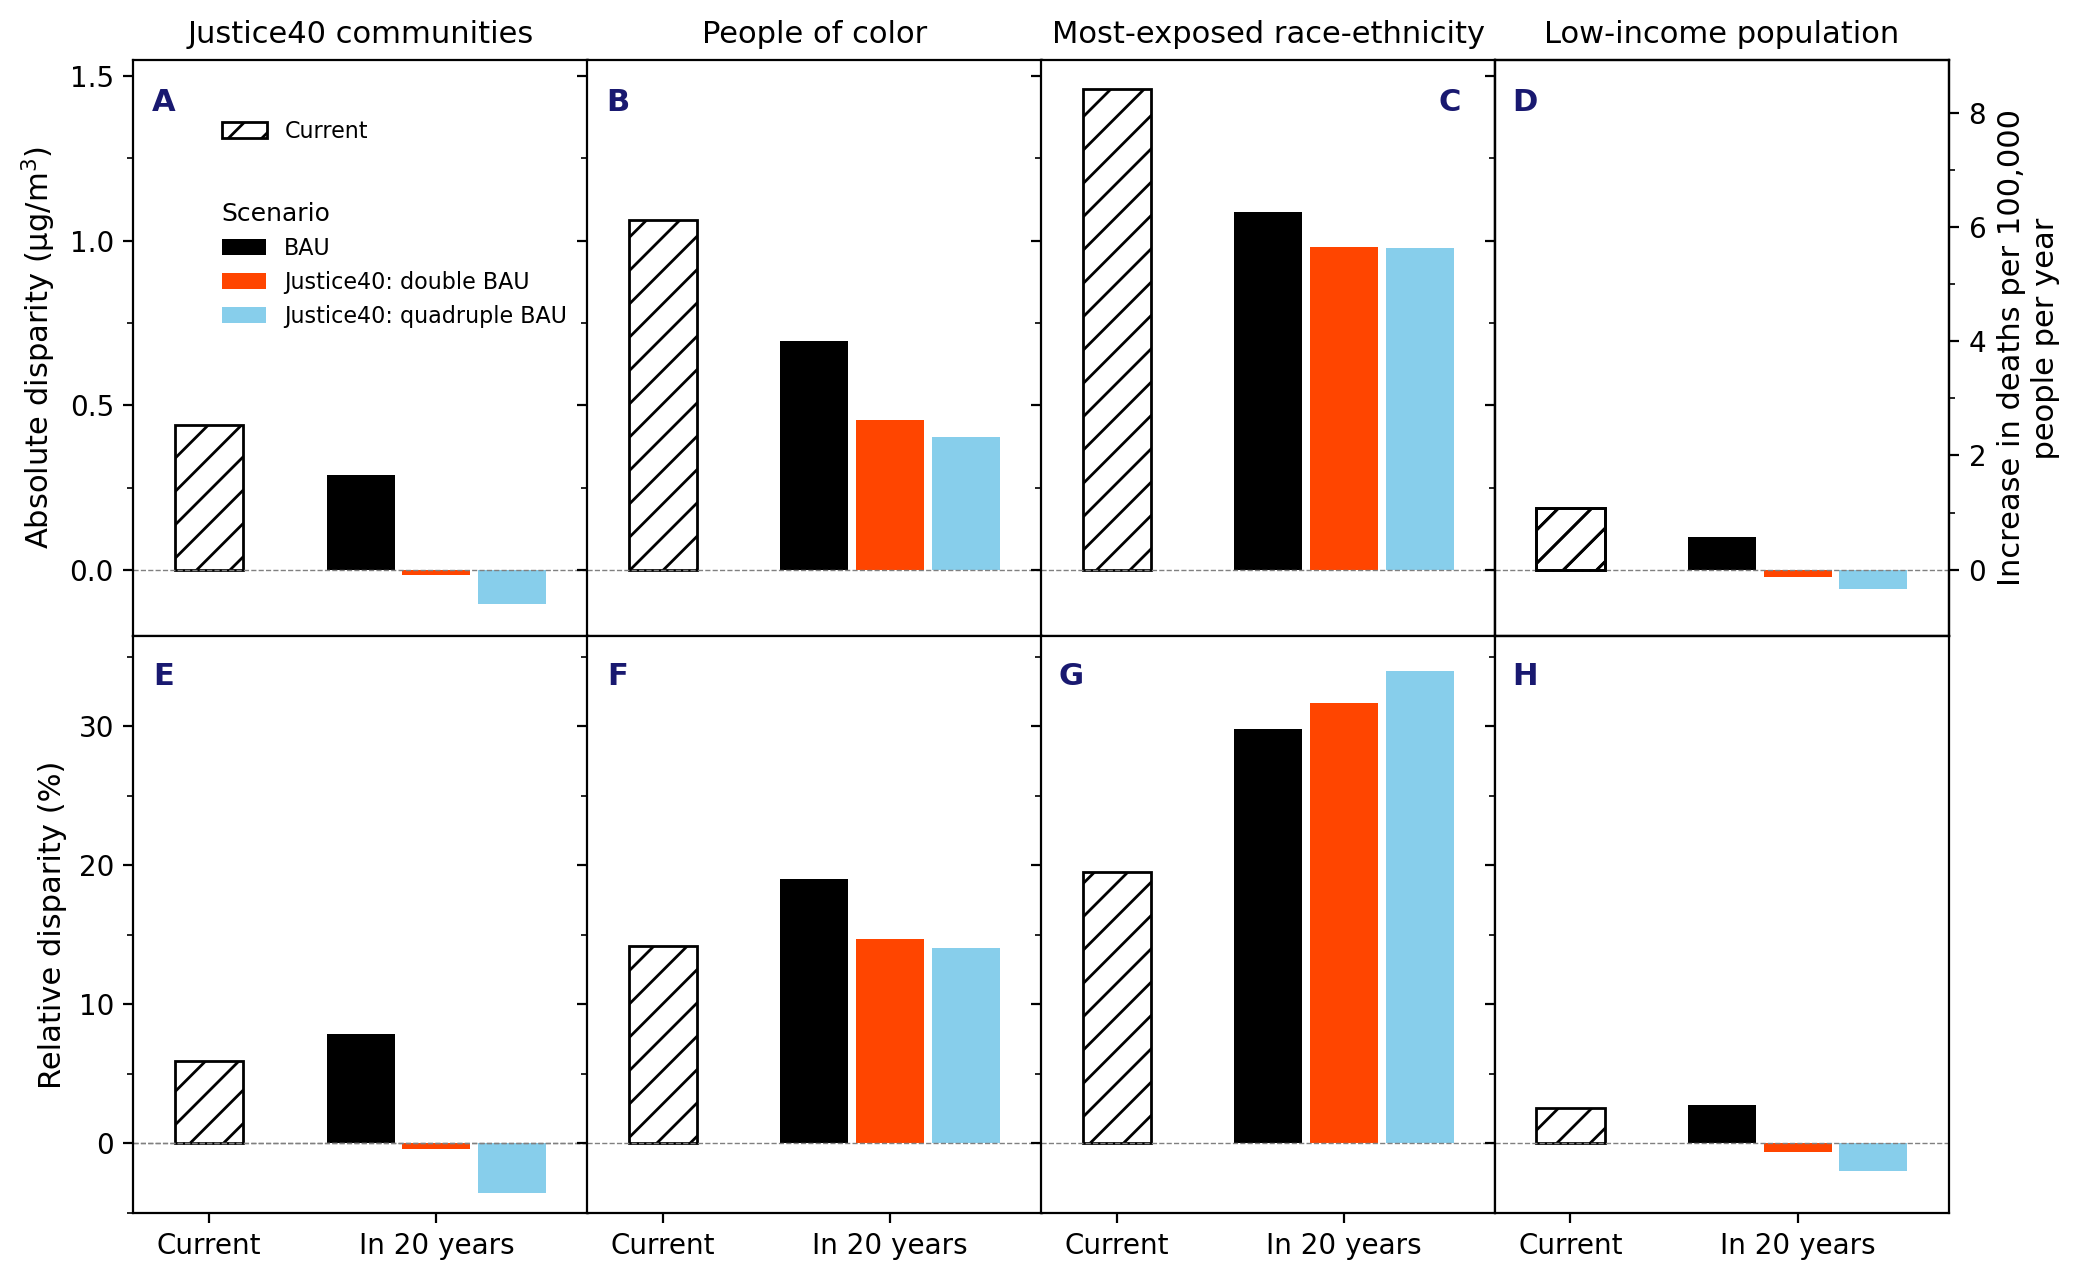

In [62]:
fig, ax = plt.subplots(nrows = 2,ncols = 4, figsize = (10.5,6.5),dpi = 200,sharey = "row",sharex = True)
plt.rcParams["font.family"] = "sans"

l1 = ax[0,0].bar(0, percentage_reduce_conc_year_BAU.disparity_j40_v1[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black", label = "Current")
l2 = ax[0,0].bar(2, percentage_reduce_conc_year_BAU.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "black", label = "BAU")
l3 = ax[0,0].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "orangered",label = "Justice40: double BAU")
l4 = ax[0,0].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "skyblue",label = "Justice40: quadruple BAU")


ax[0,1].bar(0, percentage_reduce_conc_year_BAU.disparity_poc[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,1].bar(2, percentage_reduce_conc_year_BAU.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "black")
ax[0,1].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "orangered")
ax[0,1].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "skyblue")

ax[0,2].bar(0, percentage_reduce_conc_year_BAU.disparity[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,2].bar(2, percentage_reduce_conc_year_BAU.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "black")
ax[0,2].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "orangered")
ax[0,2].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "skyblue")

ax[0,3].bar(0, percentage_reduce_conc_year_BAU.disparity_lowinc[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,3].bar(2, percentage_reduce_conc_year_BAU.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "black", label = "BAU")
ax[0,3].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "orangered",label = "Aggressive Justice40")
ax[0,3].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "skyblue",label = "Very Aggressive Justice40")

ax[0,0].set_ylabel(r'Absolute disparity ('r'$\rm\mu g/m^3)$',size = 11)
ax[0,0].set_yticks([0,0.5,1,1.5])
ax[0,0].set_yticks([-0.25,0.25,0.75,1.25], minor = True)
ax[0,1].set_yticks([0,0.5,1,1.5])
ax[0,1].set_yticks([-0.25,0.25,0.75,1.25], minor = True)
ax[0,2].set_yticks([0,0.5,1,1.5])
ax[0,2].set_yticks([-0.25,0.25,0.75,1.25], minor = True)
ax[0,3].set_yticks([0,0.5,1,1.5])
ax[0,3].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,0].set_ylim([-0.2, 1.55])

ax2 = ax[0,3].twinx()   # mirror them
ax2.bar(0, percentage_reduce_conc_year_BAU.disparity_lowinc[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax2.set_ylim([-0.2, 1.55])

conc_base = percentage_reduce_conc_year_BAU.reduce_p[20]

ax2.set_yticks([np.log(dealth_dealta/724.6+math.exp(beta*(conc_base)))/beta-conc_base for dealth_dealta in [0,2,4,6,8]])
ax2.set_yticks([np.log(dealth_dealta/724.6+math.exp(beta*(conc_base)))/beta-conc_base for dealth_dealta in [1,3,5,7]],minor = True)
ax2.set_yticklabels([0,10,20,30,40,50])

ax2.set_yticklabels([0,2,4,6,8])
ax2.set_ylabel('Increase in deaths per 100,000\n  people per year',size = 11)


ax[1,0].bar(0, percentage_reduce_conc_year_BAU.disparity_j40_v1[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,0].bar(2, percentage_reduce_conc_year_BAU.disparity_j40_v1[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,0].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orangered")
ax[1,0].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ2_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "skyblue")


ax[1,1].bar(0, percentage_reduce_conc_year_BAU.disparity_poc[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,1].bar(2, percentage_reduce_conc_year_BAU.disparity_poc[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,1].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_poc[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orangered")
ax[1,1].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity_poc[20]/percentage_reduce_conc_year_LEZ2_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "skyblue")

ax[1,2].bar(0, percentage_reduce_conc_year_BAU.disparity[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,2].bar(2, percentage_reduce_conc_year_BAU.disparity[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,2].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orangered")
ax[1,2].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity[20]/percentage_reduce_conc_year_LEZ2_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "skyblue")

ax[1,3].bar(0, percentage_reduce_conc_year_BAU.disparity_lowinc[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,3].bar(2, percentage_reduce_conc_year_BAU.disparity_lowinc[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,3].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orangered")
ax[1,3].bar(4, percentage_reduce_conc_year_LEZ2_v1.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ2_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "skyblue")


ax[1,0].set_yticks([0,10,20,30])
ax[1,0].set_yticks([-5,5,15,25,35], minor = True)
ax[1,1].set_yticks([0,10,20,30])
ax[1,1].set_yticks([-5,5,15,25,35], minor = True)
ax[1,2].set_yticks([0,10,20,30])
ax[1,2].set_yticks([-5,5,15,25,35], minor = True)
ax[1,3].set_yticks([0,10,20,30])
ax[1,3].set_yticks([-5,5,15,25,35], minor = True)

ax[0,0].set_xlim(-1,5)


ax[1,0].set_ylabel(r'Relative disparity (%)',size = 11)

ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)

ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,0].set_xticks([0,3])
ax[1,0].set_xticklabels(["Current","In 20 years"])

legend = ax[0,0].legend(handles = [l2,l3,l4],bbox_to_anchor=(0.15, 0.5), frameon=False, prop={'size': 8})
legend.set_title("Scenario", prop={'size': 9})
legend._legend_box.align = "left"
ax[0,0].add_artist(legend)
ax[0,0].legend(handles=[l1],bbox_to_anchor=(0.56, 0.93), frameon=False, prop={'size': 8})


ax[0,0].set_title("Justice40 communities",size = 11)
ax[0,1].set_title("People of color",size = 11)
ax[0,2].set_title("Most-exposed race-ethnicity",size = 11)
ax[0,3].set_title("Low-income population",size = 11)
ax[1,0].set_ylim(-5,36.5)

ax[0,0].text(-0.6,1.42, 'A', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,1].text(-0.6,1.42, 'B', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,2].text(4.4,1.42, 'C', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,3].text(-0.6,1.42, 'D', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[1,0].text(-0.6,33, 'E', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,1].text(-0.6,33, 'F', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,2].text(-0.6,33, 'G', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,3].text(-0.6,33, 'H', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
plt.tight_layout(w_pad = -1.8,h_pad = -0.55)

plt.show()

# LEZ EJScreen_variable

In [63]:
LEZ_index = ["LWINC_30","MINOR_30","PM25_30"]
for ej_variable in LEZ_index:
    vars()["sector_pollutant_justice40_ejscreen_race_LEZ_"+ej_variable]=pd.read_csv("../sector_pollutant_justice40_ejscreen_race_LEZ_"+ej_variable+".csv",index_col = 0)
    vars()["sector_pollutant_justice40_ejscreen_race_LEZ_"+ej_variable] = calculate_margin_value(vars()["sector_pollutant_justice40_ejscreen_race_LEZ_"+ej_variable])

In [64]:
def lez_df_ej_variable(data_lez, ej_variable):
    sector_pollutant_reduce_LEZ_merge_history = data_lez.merge(sector_pollutant_reduce_merge_history[["pollutant","sector","reduction_percent","reduction_slope"]].rename(columns = {"reduction_slope":"reduction_slope_total"}))


    sector_pollutant_reduce_LEZ_merge_history["reduction_slope"] = np.where(sector_pollutant_reduce_LEZ_merge_history[ej_variable]=="F",
                                                                           sector_pollutant_reduce_LEZ_merge_history["emis"]*sector_pollutant_reduce_LEZ_merge_history["reduction_percent"]/100,
                                                                           np.where(sector_pollutant_reduce_LEZ_merge_history["reduction_percent"]>0, 
                                                                                   sector_pollutant_reduce_LEZ_merge_history["emis"]*sector_pollutant_reduce_LEZ_merge_history["reduction_percent"]/100*2,0))

    temp = sector_pollutant_reduce_LEZ_merge_history[["sector","pollutant",ej_variable,"reduction_slope_total","reduction_slope"]]

    temp2 = temp[temp[ej_variable]=="T"].drop(columns = [ej_variable])

    temp2["reduction_slope_diff"] = temp2["reduction_slope_total"]-temp2["reduction_slope"]

    sector_pollutant_reduce_LEZ_merge_history = sector_pollutant_reduce_LEZ_merge_history.merge(temp2[["sector","pollutant","reduction_slope_diff"]])

    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_rebound"] = np.where(sector_pollutant_reduce_LEZ_merge_history[ej_variable]=="T",
                                                                                    sector_pollutant_reduce_LEZ_merge_history["reduction_slope"],
                                                                                    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_diff"])


    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_4times"] = np.where(sector_pollutant_reduce_LEZ_merge_history[ej_variable]=="F",
                                                                           sector_pollutant_reduce_LEZ_merge_history["emis"]*sector_pollutant_reduce_LEZ_merge_history["reduction_percent"]/100,
                                                                           np.where(sector_pollutant_reduce_LEZ_merge_history["reduction_percent"]>0, 
                                                                                   sector_pollutant_reduce_LEZ_merge_history["emis"]*sector_pollutant_reduce_LEZ_merge_history["reduction_percent"]/100*4,0))


    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_4times"].sum()

    temp = sector_pollutant_reduce_LEZ_merge_history[["sector","pollutant",ej_variable,"reduction_slope_total","reduction_slope_4times"]]

    temp2 = temp[temp[ej_variable]=="T"].drop(columns = [ej_variable])

    temp2["reduction_slope_4times_diff"] = temp2["reduction_slope_total"]-temp2["reduction_slope_4times"]

    sector_pollutant_reduce_LEZ_merge_history = sector_pollutant_reduce_LEZ_merge_history.merge(temp2[["sector","pollutant","reduction_slope_4times_diff"]])

    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_4times_rebound"] = np.where(sector_pollutant_reduce_LEZ_merge_history[ej_variable]=="T",
                                                                                    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_4times"],
                                                                                    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_4times_diff"])


    sector_pollutant_reduce_LEZ_merge_history["reduction_slope_4times_rebound"].sum()

    return(sector_pollutant_reduce_LEZ_merge_history)

In [65]:
for ej_variable in LEZ_index:
    vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable]=lez_df_ej_variable(vars()["sector_pollutant_justice40_ejscreen_race_LEZ_"+ej_variable],ej_variable)
    vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable].to_csv("sector_pollutant_reduce_LEZ_merge_history_"+ej_variable+".csv")

In [66]:
percentage_reduce_conc_year_LEZ_LWINC_30,emission_sector_LEZ_LWINC_30 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_LWINC_30,"reduction_slope")
percentage_reduce_conc_year_LEZ_LWINC_30_rebound,emission_sector_LEZ_LWINC_30_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_LWINC_30,"reduction_slope_rebound")
percentage_reduce_conc_year_LEZ2_LWINC_30,emission_sector_LEZ2_LWINC_30 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_LWINC_30,"reduction_slope_4times")
percentage_reduce_conc_year_LEZ2_LWINC_30_rebound,emission_sector_LEZ2_LWINC_30_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_LWINC_30,"reduction_slope_4times_rebound")


In [67]:
percentage_reduce_conc_year_LEZ_MINOR_30,emission_sector_LEZ_MINOR_30 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_MINOR_30,"reduction_slope")
percentage_reduce_conc_year_LEZ_MINOR_30_rebound,emission_sector_LEZ_MINOR_30_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_MINOR_30,"reduction_slope_rebound")
percentage_reduce_conc_year_LEZ2_MINOR_30,emission_sector_LEZ2_MINOR_30 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_MINOR_30,"reduction_slope_4times")
percentage_reduce_conc_year_LEZ2_MINOR_30_rebound,emission_sector_LEZ2_MINOR_30_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_MINOR_30,"reduction_slope_4times_rebound")


In [68]:
percentage_reduce_conc_year_LEZ_PM25_30,emission_sector_LEZ_PM25_30 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_PM25_30,"reduction_slope")
percentage_reduce_conc_year_LEZ_PM25_30_rebound,emission_sector_LEZ_PM25_30_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_PM25_30,"reduction_slope_rebound")
percentage_reduce_conc_year_LEZ2_PM25_30,emission_sector_LEZ2_PM25_30 = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_PM25_30,"reduction_slope_4times")
percentage_reduce_conc_year_LEZ2_PM25_30_rebound,emission_sector_LEZ2_PM25_30_rebound = sector_pollutant_reduction(sector_pollutant_reduce_LEZ_merge_history_PM25_30,"reduction_slope_4times_rebound")


In [69]:
def LEZ_rebound_adjust_ej(emission_reduction_data, merged_data,ej_variable):
    merged_data_yearly_sorted = merged_data.copy().sort_values(by = [ej_variable,"sector","pollutant"]).reset_index(drop = True)
    year_list = [0]
    
    reduce_w = [merged_data.conc_w.sum()]
    reduce_b = [merged_data.conc_b.sum()]
    reduce_a = [merged_data.conc_a.sum()]
    reduce_h = [merged_data.conc_h.sum()]
    reduce_m = [merged_data.conc_m.sum()]
    reduce_o = [merged_data.conc_o.sum()]
    reduce_n = [merged_data.conc_n.sum()]
    reduce_p = [merged_data.conc_p.sum()]
    reduce_j40_v1 = [merged_data.conc_j40_v1_tract.sum()]
    reduce_outside_v1 = [merged_data.conc_outside_v1_tract.sum()]
    reduce_lowinc = [merged_data.conc_lowinc.sum()]
    reduce_highinc = [merged_data.conc_highinc.sum()]

    year = 0
    emis_reduce = [0]
    emis = merged_data.emis.sum()

    for i in range(1,21):
        year += 1
        conc_w = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_w"])
        conc_b = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_b"])
        conc_a = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_a"])
        conc_h = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_h"])
        conc_m = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_m"])
        conc_n = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_n"])
        conc_o = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_o"])
        conc_p = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_p"])
        conc_j40_v1 = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_j40_v1_tract"])
        conc_outside_v1 = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_outside_v1_tract"])
        conc_lowinc = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_lowinc"])
        conc_highinc = sum(emission_reduction_data[i]*merged_data_yearly_sorted["margin_highinc"])

        emis_reduce_value = emis-emission_reduction_data[i].sum()

        year_list.append(year)
        reduce_w.append(conc_w)
        reduce_b.append(conc_b)
        reduce_a.append(conc_a)
        reduce_h.append(conc_h)
        reduce_m.append(conc_m)
        reduce_n.append(conc_n)
        reduce_o.append(conc_o)
        reduce_p.append(conc_p)
        reduce_j40_v1.append(conc_j40_v1)
        reduce_outside_v1.append(conc_outside_v1)
        reduce_lowinc.append(conc_lowinc)
        reduce_highinc.append(conc_highinc)
        emis_reduce.append(emis_reduce_value)

    percentage_reduce_LEZ_conc_year = pd.DataFrame({"year":year_list,"reduce_w":reduce_w,"reduce_b":reduce_b,
                                                            "reduce_h":reduce_h,"reduce_m":reduce_m,"reduce_n":reduce_n,
                                                             "reduce_a":reduce_a,"reduce_o":reduce_o,"reduce_p":reduce_p,
                                                    "reduce_j40_v1":reduce_j40_v1,"reduce_outside_v1":reduce_outside_v1,
                                                    "reduce_lowinc":reduce_lowinc,"reduce_highinc":reduce_highinc, "emis":emis_reduce})
    percentage_reduce_LEZ_conc_year["disparity_j40_v1"] = percentage_reduce_LEZ_conc_year["reduce_j40_v1"]-percentage_reduce_LEZ_conc_year["reduce_p"]
    
    percentage_reduce_LEZ_conc_year["disparity"] = percentage_reduce_LEZ_conc_year[["reduce_w","reduce_h","reduce_b","reduce_a","reduce_o","reduce_m"]].max(axis=1)-percentage_reduce_LEZ_conc_year["reduce_p"]
    percentage_reduce_LEZ_conc_year["disparity_lowinc"] = percentage_reduce_LEZ_conc_year["reduce_lowinc"]-percentage_reduce_LEZ_conc_year["reduce_p"]
    
    percentage_reduce_LEZ_conc_year["reduce_meg"] = percentage_reduce_LEZ_conc_year[["reduce_w","reduce_h","reduce_b","reduce_a","reduce_o","reduce_m"]].max(axis=1)
    percentage_reduce_LEZ_conc_year["reduce_poc"] = (percentage_reduce_LEZ_conc_year["reduce_p"]*306675006-percentage_reduce_LEZ_conc_year["reduce_w"]*196052889)/110622117
    percentage_reduce_LEZ_conc_year["disparity_poc"] = percentage_reduce_LEZ_conc_year["reduce_poc"]-percentage_reduce_LEZ_conc_year["reduce_p"]

    return(percentage_reduce_LEZ_conc_year)



In [70]:
emission_sector_LEZ_LWINC_30_rebound["LWINC_30"] = sector_pollutant_reduce_LEZ_merge_history_LWINC_30.LWINC_30
emission_sector_LEZ_PM25_30_rebound["PM25_30"] = sector_pollutant_reduce_LEZ_merge_history_PM25_30.PM25_30
emission_sector_LEZ_MINOR_30_rebound["MINOR_30"] = sector_pollutant_reduce_LEZ_merge_history_MINOR_30.MINOR_30

ej_variable = "LWINC_30"
emission_sector_LEZ_LWINC_30_rebound_new = emission_sector_LEZ_LWINC_30_rebound.sort_values(by = [ej_variable,"sector","pollutant"]).reset_index(drop = True)
replace_values_LEZ_LWINC_30_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ_LWINC_30_rebound_new.drop(columns = [ej_variable,"sector","pollutant"]).iloc[61:].reset_index(drop = True)

replace_values_LEZ_LWINC_30_rebound["sector"]=emission_sector_LEZ_LWINC_30_rebound_new["sector"][0:61]
replace_values_LEZ_LWINC_30_rebound["pollutant"]=emission_sector_LEZ_LWINC_30_rebound_new["pollutant"][0:61]
replace_values_LEZ_LWINC_30_rebound[ej_variable]="F"

emission_sector_LEZ_LWINC_30_rebound_new = pd.concat([replace_values_LEZ_LWINC_30_rebound[[ej_variable,"sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ_LWINC_30_rebound_new.iloc[61:]])
percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new = LEZ_rebound_adjust_ej(emission_sector_LEZ_LWINC_30_rebound_new, vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable],ej_variable)

ej_variable = "MINOR_30"
emission_sector_LEZ_MINOR_30_rebound_new = emission_sector_LEZ_MINOR_30_rebound.sort_values(by = [ej_variable,"sector","pollutant"]).reset_index(drop = True)
replace_values_LEZ_MINOR_30_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ_MINOR_30_rebound_new.drop(columns = [ej_variable,"sector","pollutant"]).iloc[61:].reset_index(drop = True)

replace_values_LEZ_MINOR_30_rebound["sector"]=emission_sector_LEZ_MINOR_30_rebound_new["sector"][0:61]
replace_values_LEZ_MINOR_30_rebound["pollutant"]=emission_sector_LEZ_MINOR_30_rebound_new["pollutant"][0:61]
replace_values_LEZ_MINOR_30_rebound[ej_variable]="F"

emission_sector_LEZ_MINOR_30_rebound_new = pd.concat([replace_values_LEZ_MINOR_30_rebound[[ej_variable,"sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ_MINOR_30_rebound_new.iloc[61:]])
percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new = LEZ_rebound_adjust_ej(emission_sector_LEZ_MINOR_30_rebound_new, vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable],ej_variable)

ej_variable = "PM25_30"
emission_sector_LEZ_PM25_30_rebound_new = emission_sector_LEZ_PM25_30_rebound.sort_values(by = [ej_variable,"sector","pollutant"]).reset_index(drop = True)
replace_values_LEZ_PM25_30_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ_PM25_30_rebound_new.drop(columns = [ej_variable,"sector","pollutant"]).iloc[61:].reset_index(drop = True)

replace_values_LEZ_PM25_30_rebound["sector"]=emission_sector_LEZ_PM25_30_rebound_new["sector"][0:61]
replace_values_LEZ_PM25_30_rebound["pollutant"]=emission_sector_LEZ_PM25_30_rebound_new["pollutant"][0:61]
replace_values_LEZ_PM25_30_rebound[ej_variable]="F"

emission_sector_LEZ_PM25_30_rebound_new = pd.concat([replace_values_LEZ_PM25_30_rebound[[ej_variable,"sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ_PM25_30_rebound_new.iloc[61:]])
percentage_reduce_conc_year_LEZ_PM25_30_rebound_new = LEZ_rebound_adjust_ej(emission_sector_LEZ_PM25_30_rebound_new, vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable],ej_variable)


In [71]:
emission_sector_LEZ2_LWINC_30_rebound["LWINC_30"] = sector_pollutant_reduce_LEZ_merge_history_LWINC_30.LWINC_30
emission_sector_LEZ2_PM25_30_rebound["PM25_30"] = sector_pollutant_reduce_LEZ_merge_history_PM25_30.PM25_30
emission_sector_LEZ2_MINOR_30_rebound["MINOR_30"] = sector_pollutant_reduce_LEZ_merge_history_MINOR_30.MINOR_30

ej_variable = "LWINC_30"
emission_sector_LEZ2_LWINC_30_rebound_new = emission_sector_LEZ2_LWINC_30_rebound.sort_values(by = [ej_variable,"sector","pollutant"]).reset_index(drop = True)
replace_values_LEZ2_LWINC_30_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ2_LWINC_30_rebound_new.drop(columns = [ej_variable,"sector","pollutant"]).iloc[61:].reset_index(drop = True)

replace_values_LEZ2_LWINC_30_rebound["sector"]=emission_sector_LEZ2_LWINC_30_rebound_new["sector"][0:61]
replace_values_LEZ2_LWINC_30_rebound["pollutant"]=emission_sector_LEZ2_LWINC_30_rebound_new["pollutant"][0:61]
replace_values_LEZ2_LWINC_30_rebound[ej_variable]="F"

emission_sector_LEZ2_LWINC_30_rebound_new = pd.concat([replace_values_LEZ2_LWINC_30_rebound[[ej_variable,"sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ2_LWINC_30_rebound_new.iloc[61:]])
percentage_reduce_conc_year_LEZ2_LWINC_30_rebound_new = LEZ_rebound_adjust_ej(emission_sector_LEZ2_LWINC_30_rebound_new, vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable],ej_variable)

ej_variable = "MINOR_30"
emission_sector_LEZ2_MINOR_30_rebound_new = emission_sector_LEZ2_MINOR_30_rebound.sort_values(by = [ej_variable,"sector","pollutant"]).reset_index(drop = True)
replace_values_LEZ2_MINOR_30_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ2_MINOR_30_rebound_new.drop(columns = [ej_variable,"sector","pollutant"]).iloc[61:].reset_index(drop = True)

replace_values_LEZ2_MINOR_30_rebound["sector"]=emission_sector_LEZ2_MINOR_30_rebound_new["sector"][0:61]
replace_values_LEZ2_MINOR_30_rebound["pollutant"]=emission_sector_LEZ2_MINOR_30_rebound_new["pollutant"][0:61]
replace_values_LEZ2_MINOR_30_rebound[ej_variable]="F"

emission_sector_LEZ2_MINOR_30_rebound_new = pd.concat([replace_values_LEZ2_MINOR_30_rebound[[ej_variable,"sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ2_MINOR_30_rebound_new.iloc[61:]])
percentage_reduce_conc_year_LEZ2_MINOR_30_rebound_new = LEZ_rebound_adjust_ej(emission_sector_LEZ2_MINOR_30_rebound_new, vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable],ej_variable)

ej_variable = "PM25_30"
emission_sector_LEZ2_PM25_30_rebound_new = emission_sector_LEZ2_PM25_30_rebound.sort_values(by = [ej_variable,"sector","pollutant"]).reset_index(drop = True)
replace_values_LEZ2_PM25_30_rebound = emission_sector_BAU.groupby(["sector","pollutant"]).sum().reset_index().drop(columns = ["sector","pollutant"])-emission_sector_LEZ2_PM25_30_rebound_new.drop(columns = [ej_variable,"sector","pollutant"]).iloc[61:].reset_index(drop = True)

replace_values_LEZ2_PM25_30_rebound["sector"]=emission_sector_LEZ2_PM25_30_rebound_new["sector"][0:61]
replace_values_LEZ2_PM25_30_rebound["pollutant"]=emission_sector_LEZ2_PM25_30_rebound_new["pollutant"][0:61]
replace_values_LEZ2_PM25_30_rebound[ej_variable]="F"

emission_sector_LEZ2_PM25_30_rebound_new = pd.concat([replace_values_LEZ2_PM25_30_rebound[[ej_variable,"sector","pollutant",0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],emission_sector_LEZ2_PM25_30_rebound_new.iloc[61:]])
percentage_reduce_conc_year_LEZ2_PM25_30_rebound_new = LEZ_rebound_adjust_ej(emission_sector_LEZ2_PM25_30_rebound_new, vars()["sector_pollutant_reduce_LEZ_merge_history_"+ej_variable],ej_variable)


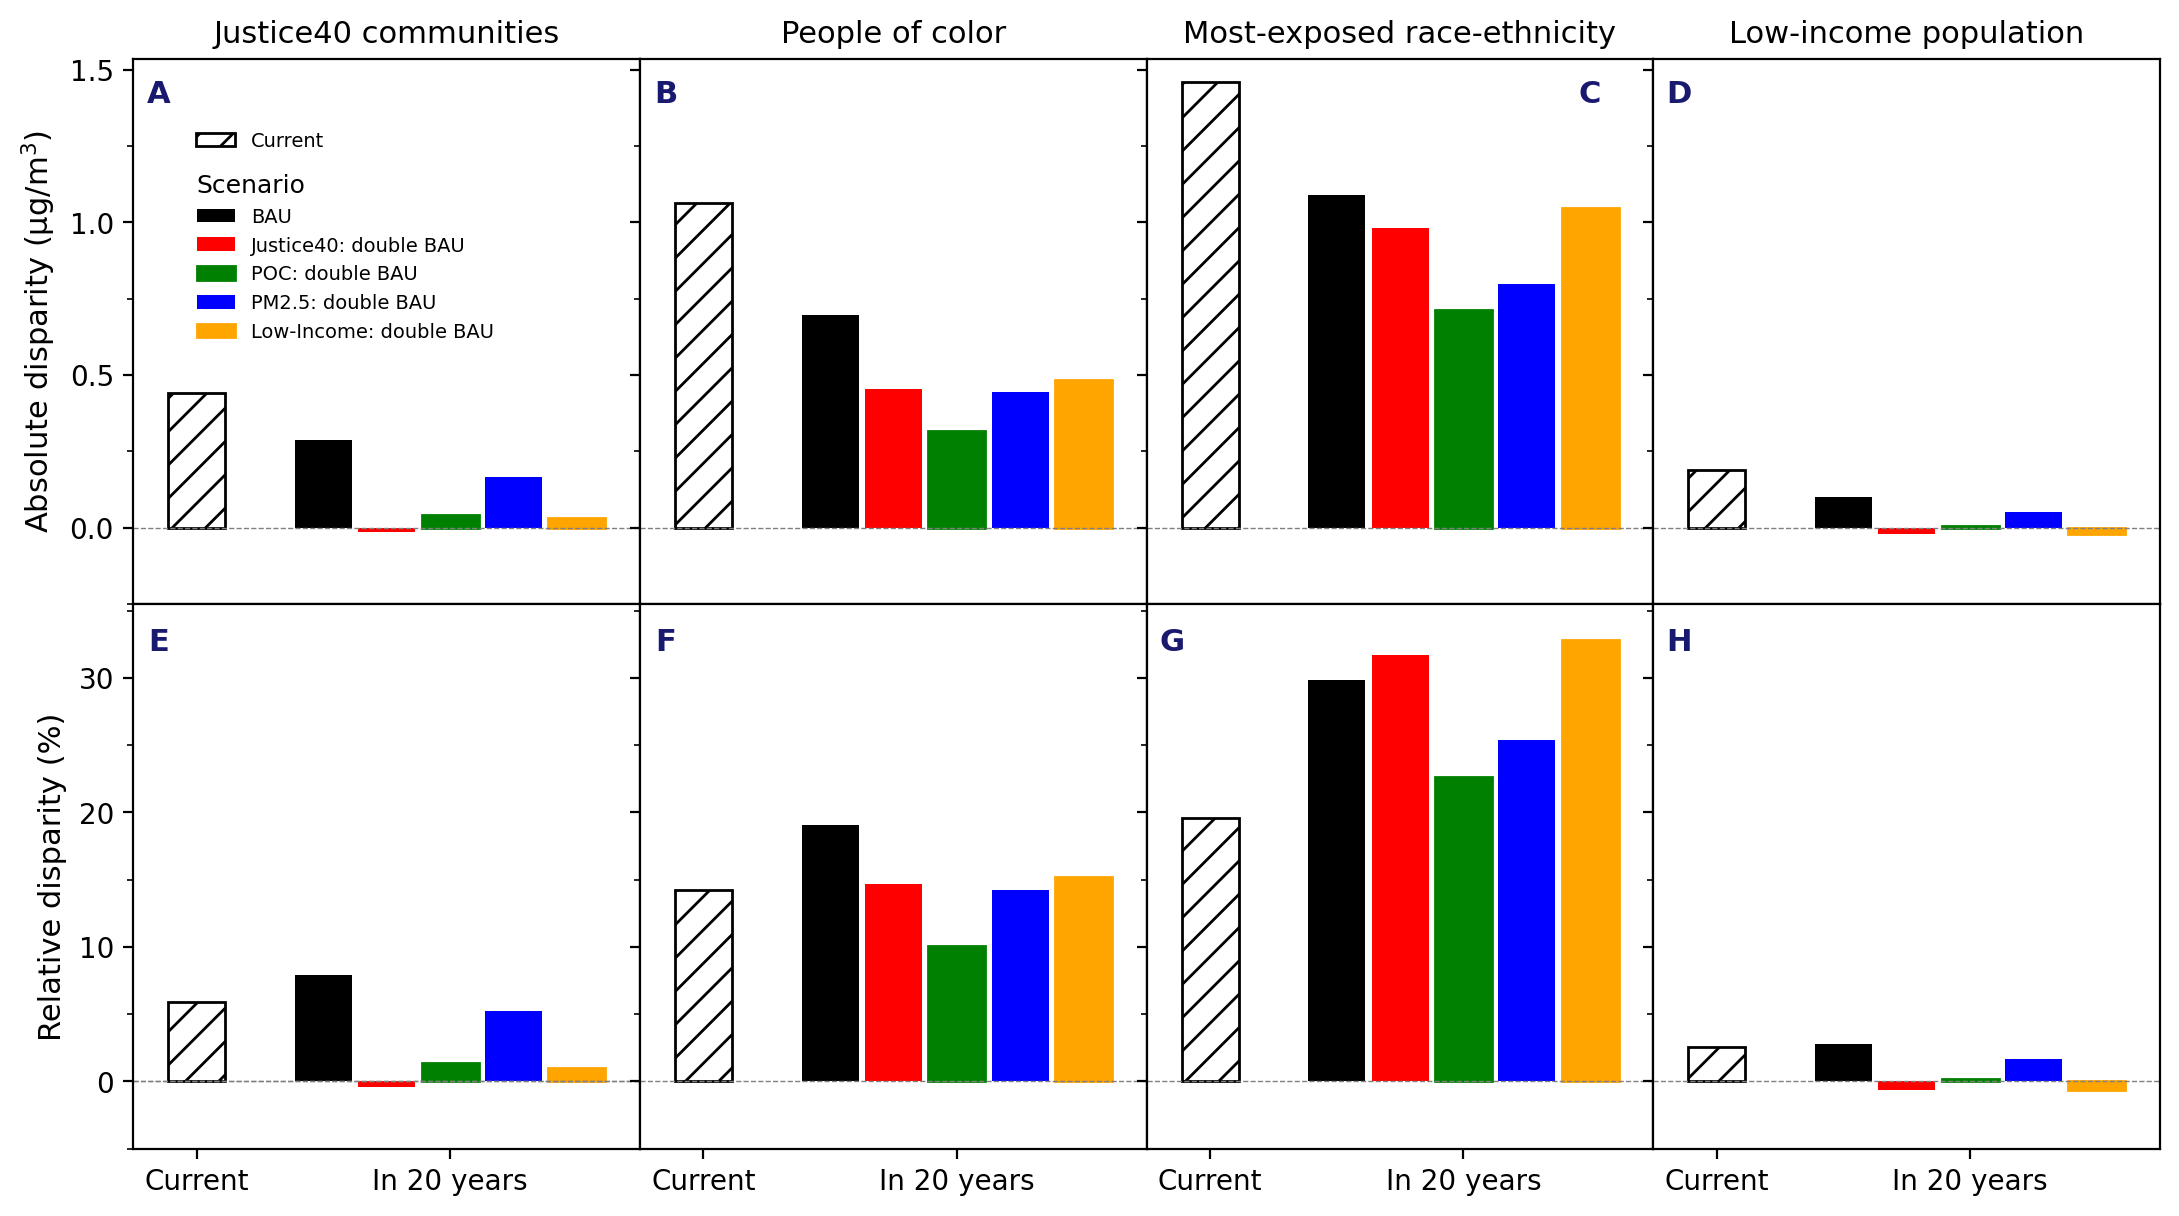

In [72]:
fig, ax = plt.subplots(nrows = 2,ncols = 4, figsize = (11,6),dpi = 200,sharey = "row",sharex = True)
plt.rcParams["font.family"] = "sans"

#ax[0,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_j40_v1,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
l1 = ax[0,0].bar(0, percentage_reduce_conc_year_BAU.disparity_j40_v1[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black", label = "Current")
l2 = ax[0,0].bar(2, percentage_reduce_conc_year_BAU.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "black", label = "BAU")
l3 = ax[0,0].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "red",label = "Justice40: double BAU")
l4 = ax[0,0].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green",label = "POC: double BAU")
l5 = ax[0,0].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "blue",label = "PM2.5: double BAU")
l6 = ax[0,0].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange",label = "Low-Income: double BAU")


ax[0,1].bar(0, percentage_reduce_conc_year_BAU.disparity_poc[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,1].bar(2, percentage_reduce_conc_year_BAU.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "black")
ax[0,1].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "red")
ax[0,1].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[0,1].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[0,1].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[0,2].bar(0, percentage_reduce_conc_year_BAU.disparity[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,2].bar(2, percentage_reduce_conc_year_BAU.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "black")
ax[0,2].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "red")
ax[0,2].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[0,2].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[0,2].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[0,3].bar(0, percentage_reduce_conc_year_BAU.disparity_lowinc[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,3].bar(2, percentage_reduce_conc_year_BAU.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "black", label = "BAU")
ax[0,3].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "red",label = "Justice40: double BAU")
ax[0,3].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "green",label = "POC: double BAU",edgecolor = "green")
ax[0,3].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "blue",label = "PM2.5: double BAU")
ax[0,3].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange",label = "Low-Income: double BAU")

ax[0,0].set_ylabel(r'Absolute disparity ('r'$\rm\mu g/m^3)$',size = 11)
ax[0,0].set_yticks([0,0.5,1,1.5])
ax[0,0].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,1].set_yticks([0,0.5,1,1.5])
ax[0,1].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,2].set_yticks([0,0.5,1,1.5])
ax[0,2].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,3].set_yticks([0,0.5,1,1.5])
ax[0,3].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

#ax[0,0].set_ylim(0, 0.68)
#plt.tight_layout(w_pad = 1.5)
ax[0,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)


ax[1,0].bar(0, percentage_reduce_conc_year_BAU.disparity_j40_v1[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,0].bar(2, percentage_reduce_conc_year_BAU.disparity_j40_v1[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,0].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,0].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_MINOR_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,0].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_PM25_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,0].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_LWINC_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")


ax[1,1].bar(0, percentage_reduce_conc_year_BAU.disparity_poc[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,1].bar(2, percentage_reduce_conc_year_BAU.disparity_poc[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,1].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_poc[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,1].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity_poc[20]/percentage_reduce_conc_year_LEZ_MINOR_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,1].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity_poc[20]/percentage_reduce_conc_year_LEZ_PM25_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,1].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity_poc[20]/percentage_reduce_conc_year_LEZ_LWINC_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[1,2].bar(0, percentage_reduce_conc_year_BAU.disparity[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,2].bar(2, percentage_reduce_conc_year_BAU.disparity[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,2].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,2].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity[20]/percentage_reduce_conc_year_LEZ_MINOR_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,2].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity[20]/percentage_reduce_conc_year_LEZ_PM25_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,2].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity[20]/percentage_reduce_conc_year_LEZ_LWINC_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[1,3].bar(0, percentage_reduce_conc_year_BAU.disparity_lowinc[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,3].bar(2, percentage_reduce_conc_year_BAU.disparity_lowinc[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,3].bar(3, percentage_reduce_conc_year_LEZ_v1.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_v1.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,3].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_MINOR_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,3].bar(5, percentage_reduce_conc_year_LEZ_PM25_30.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_PM25_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,3].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_LWINC_30.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

plt.tight_layout(w_pad = -0.35,h_pad = -0.35)

ax[1,0].set_yticks([0,10,20,30])
ax[1,0].set_yticks([-5,5,15,25,35], minor = True)
ax[1,1].set_yticks([0,10,20,30])
ax[1,1].set_yticks([-5,5,15,25,35], minor = True)
ax[1,2].set_yticks([0,10,20,30])
ax[1,2].set_yticks([-5,5,15,25,35], minor = True)
ax[1,3].set_yticks([0,10,20,30])
ax[1,3].set_yticks([-5,5,15,25,35], minor = True)

ax[0,0].set_xlim(-1,7)

#legend = ax[0,3].legend(bbox_to_anchor=(0.12, 0.5), frameon=False, prop={'size': 8})
#legend.set_title("Scenario", prop={'size': 9})
#legend._legend_box.align = "left"

ax[1,0].set_ylabel(r'Relative disparity (%)',size = 11)
#ax[1,0].set_xlabel("year",size = 11)

ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)

ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,0].set_xticks([0,4])
ax[1,0].set_xticklabels(["Current","In 20 years"])

legend = ax[0,0].legend(handles = [l2,l3,l4,l5,l6],bbox_to_anchor=(0.09, 0.45), frameon=False, prop={'size': 7})
legend.set_title("Scenario", prop={'size': 9})
legend._legend_box.align = "left"
ax[0,0].add_artist(legend)
ax[0,0].legend(handles=[l1],bbox_to_anchor=(0.41, 0.9), frameon=False, prop={'size': 7})

ax[0,0].set_title("Justice40 communities",size = 11)
ax[0,1].set_title("People of color",size = 11)
ax[0,2].set_title("Most-exposed race-ethnicity",size = 11)
ax[0,3].set_title("Low-income population",size = 11)

ax[1,0].set_ylim(-5,35.5)


ax[0,0].text(-0.6,1.42, 'A', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,1].text(-0.6,1.42, 'B', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,2].text(6,1.42, 'C', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,3].text(-0.6,1.42, 'D', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[1,0].text(-0.6,32, 'E', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,1].text(-0.6,32, 'F', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,2].text(-0.6,32, 'G', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,3].text(-0.6,32, 'H', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')

plt.show()



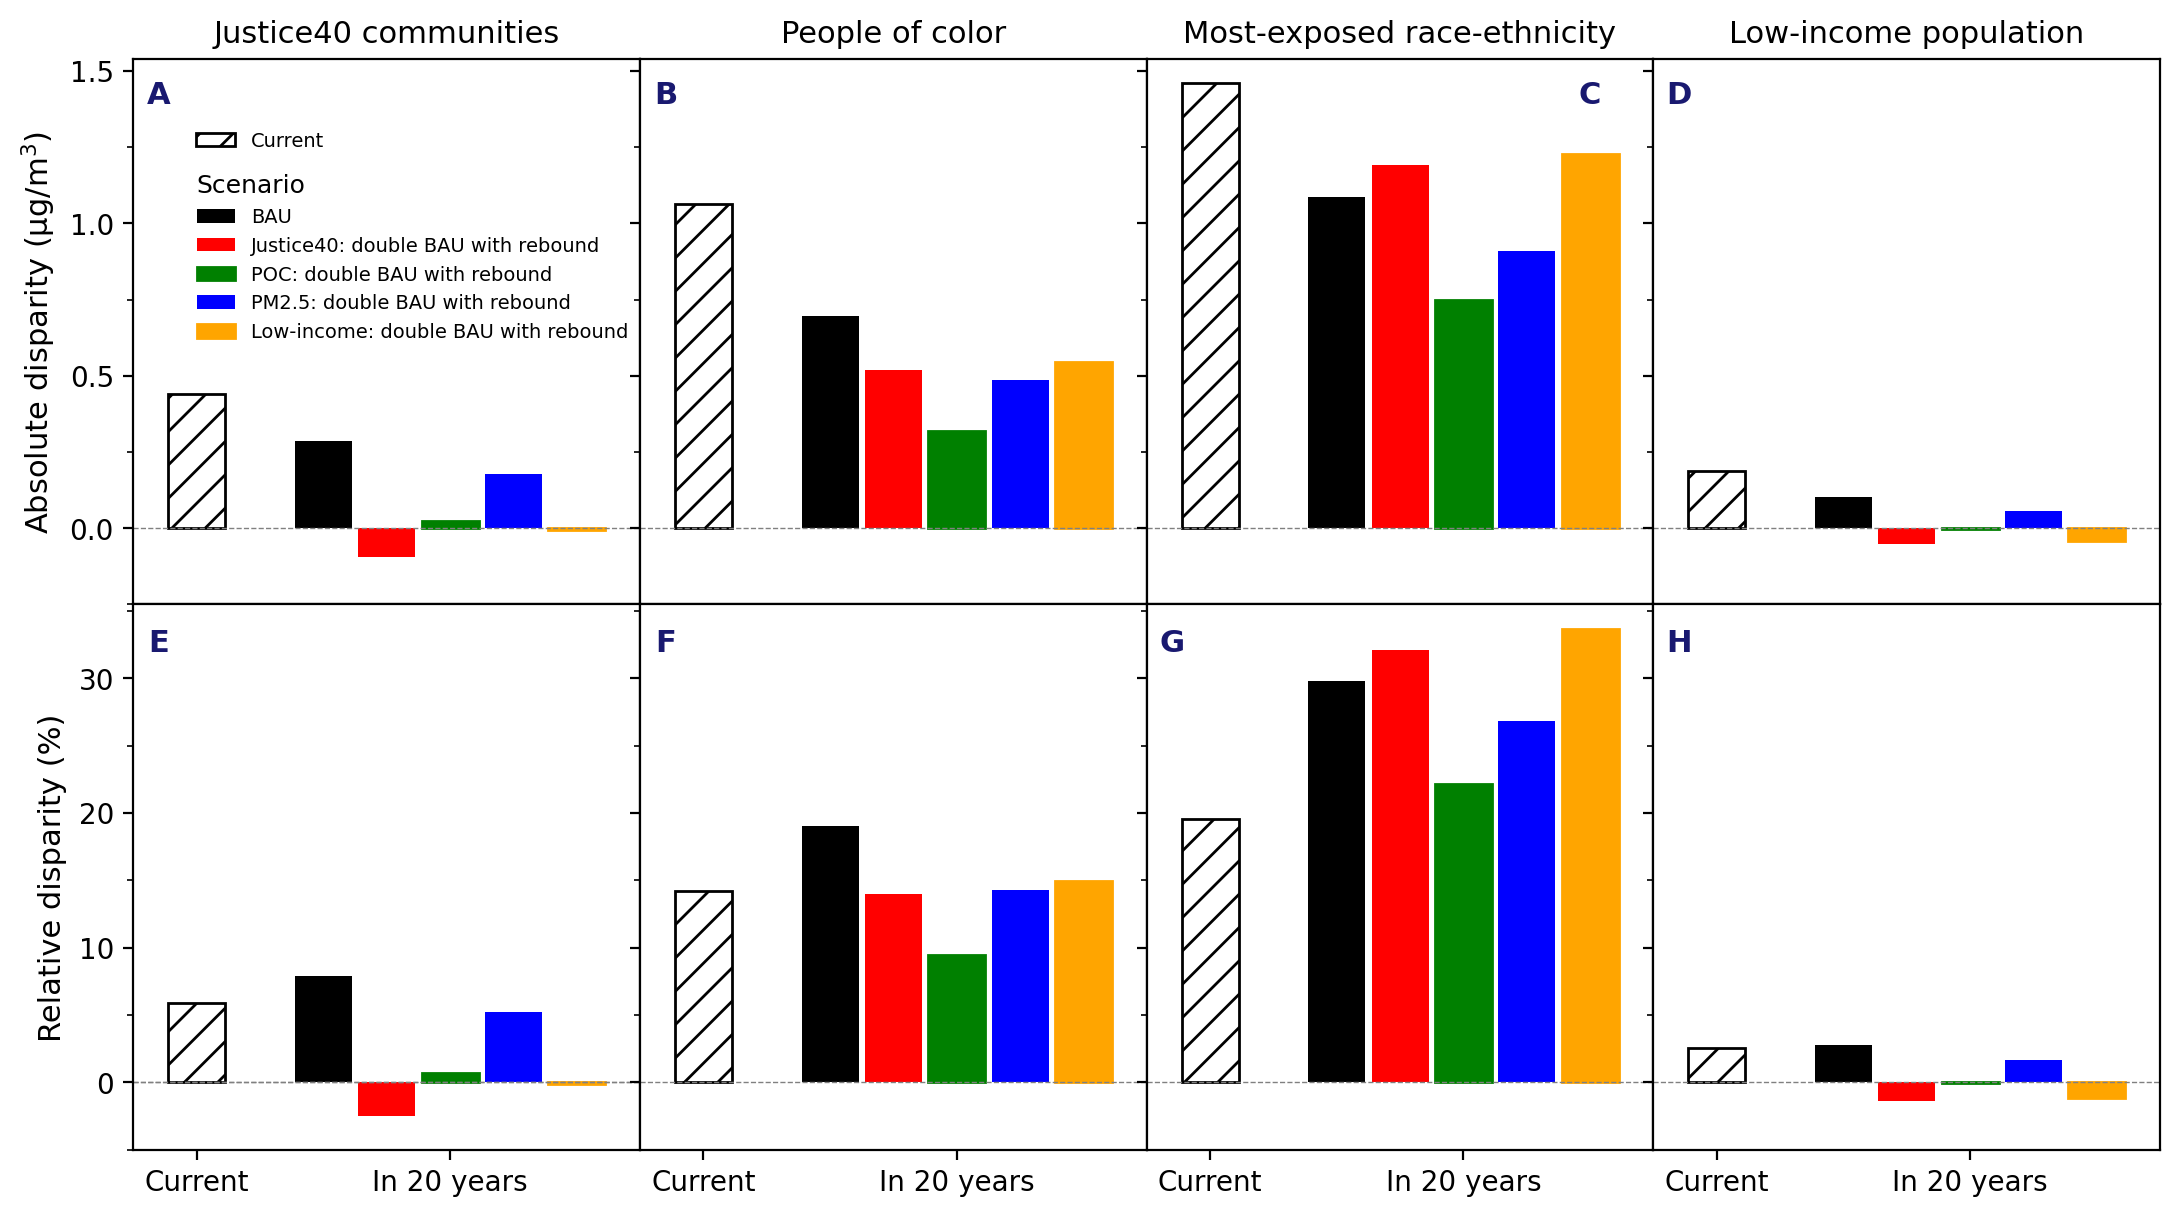

In [73]:
fig, ax = plt.subplots(nrows = 2,ncols = 4, figsize = (11,6),dpi = 200,sharey = "row",sharex = True)
plt.rcParams["font.family"] = "sans"

#ax[0,0].plot(percentage_reduce_conc_year_BAU.year,percentage_reduce_conc_year_BAU.disparity_j40_v1,color = "black",label = "BAU",marker = "o",markersize = 3,linewidth = 2)
l1 = ax[0,0].bar(0, percentage_reduce_conc_year_BAU.disparity_j40_v1[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black", label = "Current")
l2 = ax[0,0].bar(2, percentage_reduce_conc_year_BAU.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "black", label = "BAU")
l3 = ax[0,0].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "red",label = "Justice40: double BAU with rebound")
l4 = ax[0,0].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green",label = "POC: double BAU with rebound")
l5 = ax[0,0].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "blue",label = "PM2.5: double BAU with rebound")
l6 = ax[0,0].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity_j40_v1[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange",label = "Low-income: double BAU with rebound")


ax[0,1].bar(0, percentage_reduce_conc_year_BAU.disparity_poc[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,1].bar(2, percentage_reduce_conc_year_BAU.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "black")
ax[0,1].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "red")
ax[0,1].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[0,1].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[0,1].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity_poc[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[0,2].bar(0, percentage_reduce_conc_year_BAU.disparity[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,2].bar(2, percentage_reduce_conc_year_BAU.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "black")
ax[0,2].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "red")
ax[0,2].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[0,2].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[0,2].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[0,3].bar(0, percentage_reduce_conc_year_BAU.disparity_lowinc[0], width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[0,3].bar(2, percentage_reduce_conc_year_BAU.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "black", label = "BAU")
ax[0,3].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "red",label = "Justice40: double BAU with rebound")
ax[0,3].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "green",label = "POC: double BAU with rebound",edgecolor = "green")
ax[0,3].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "blue",label = "PM2.5: double BAU with rebound")
ax[0,3].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity_lowinc[20], width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange",label = "Low-income: double BAU with rebound")

ax[0,0].set_ylabel(r'Absolute disparity ('r'$\rm\mu g/m^3)$',size = 11)
ax[0,0].set_yticks([0,0.5,1,1.5])
ax[0,0].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,1].set_yticks([0,0.5,1,1.5])
ax[0,1].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,2].set_yticks([0,0.5,1,1.5])
ax[0,2].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,3].set_yticks([0,0.5,1,1.5])
ax[0,3].set_yticks([-0.25,0.25,0.75,1.25], minor = True)

ax[0,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[0,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)


ax[1,0].bar(0, percentage_reduce_conc_year_BAU.disparity_j40_v1[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,0].bar(2, percentage_reduce_conc_year_BAU.disparity_j40_v1[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,0].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,0].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,0].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,0].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity_j40_v1[20]/percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")


ax[1,1].bar(0, percentage_reduce_conc_year_BAU.disparity_poc[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,1].bar(2, percentage_reduce_conc_year_BAU.disparity_poc[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,1].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_poc[20]/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,1].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity_poc[20]/percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,1].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity_poc[20]/percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,1].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity_poc[20]/percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[1,2].bar(0, percentage_reduce_conc_year_BAU.disparity[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,2].bar(2, percentage_reduce_conc_year_BAU.disparity[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,2].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity[20]/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,2].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity[20]/percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,2].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity[20]/percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,2].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity[20]/percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

ax[1,3].bar(0, percentage_reduce_conc_year_BAU.disparity_lowinc[0]/percentage_reduce_conc_year_BAU.reduce_p[0]*100, width=0.9, bottom=None, align='center', data=None, color = "none",hatch = "//",edgecolor = "black")
ax[1,3].bar(2, percentage_reduce_conc_year_BAU.disparity_lowinc[20]/percentage_reduce_conc_year_BAU.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "black")
ax[1,3].bar(3, percentage_reduce_conc_year_LEZ_v1_rebound_new.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_v1_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "red")
ax[1,3].bar(4, percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_MINOR_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "green",edgecolor = "green")
ax[1,3].bar(5, percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_PM25_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "blue")
ax[1,3].bar(6, percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.disparity_lowinc[20]/percentage_reduce_conc_year_LEZ_LWINC_30_rebound_new.reduce_p[20]*100, width=0.9, bottom=None, align='center', data=None, color = "orange",edgecolor = "orange")

plt.tight_layout(w_pad = -0.35,h_pad = -0.35)

ax[1,0].set_yticks([0,10,20,30])
ax[1,0].set_yticks([-5,5,15,25,35], minor = True)
ax[1,1].set_yticks([0,10,20,30])
ax[1,1].set_yticks([-5,5,15,25,35], minor = True)
ax[1,2].set_yticks([0,10,20,30])
ax[1,2].set_yticks([-5,5,15,25,35], minor = True)
ax[1,3].set_yticks([0,10,20,30])
ax[1,3].set_yticks([-5,5,15,25,35], minor = True)

ax[0,0].set_xlim(-1,7)


ax[1,0].set_ylabel(r'Relative disparity (%)',size = 11)

ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,1].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,2].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,3].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)

ax[1,0].axhline(y = 0, color = "grey",linestyle = "--", linewidth = 0.5)
ax[1,0].set_xticks([0,4])
ax[1,0].set_xticklabels(["Current","In 20 years"])

legend = ax[0,0].legend(handles = [l2,l3,l4,l5,l6],bbox_to_anchor=(0.09, 0.45), frameon=False, prop={'size': 7})
legend.set_title("Scenario", prop={'size': 9})
legend._legend_box.align = "left"
ax[0,0].add_artist(legend)
ax[0,0].legend(handles=[l1],bbox_to_anchor=(0.41, 0.9), frameon=False, prop={'size': 7})


ax[0,0].set_title("Justice40 communities",size = 11)
ax[0,1].set_title("People of color",size = 11)
ax[0,2].set_title("Most-exposed race-ethnicity",size = 11)
ax[0,3].set_title("Low-income population",size = 11)

ax[1,0].set_ylim(-5,35.5)


ax[0,0].text(-0.6,1.42, 'A', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,1].text(-0.6,1.42, 'B', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,2].text(6,1.42, 'C', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[0,3].text(-0.6,1.42, 'D', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold', verticalalignment = "center")
ax[1,0].text(-0.6,32, 'E', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,1].text(-0.6,32, 'F', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,2].text(-0.6,32, 'G', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')
ax[1,3].text(-0.6,32, 'H', fontsize = 11,horizontalalignment='center',color = "midnightblue", weight='bold')

plt.show()


